## Example: Inverse design of a grabbing tool

#### Load packages

In [1]:
from pyLattice2D.models.Lattice import DifferentiableLattice
from pyLattice2D.models.FEM import FEModel
from pyLattice2D.methods.mechanical_properties import get_Yprop
from pyLattice2D.utils.record import RecordAndSave
import torch
import numpy as np
from tqdm import trange
from pyLattice2D.lattices.utils import get_lattice_object


#### Create a lattice with a small cavity on the right side

In [2]:
lattice_setup = {'type': 'honeycomb',
                 'num': 15, # if voronoi -> number of cells, else: number of layers
                 'seed': 1224,
                 'remove_nodes': 0,
                 'remove_edges': 0.,
                 'move_nodes': [0., 0.8],
                 'add_edges': [0, 0.2],
                 'BeamCrossArea_A': 0.00002,
                'YoungsModulus_E': 2*1e9,
                'oversaturate_edges': None,
                 'edge_mask_init': {'random': False, 'modulating_factor': .2, 'offset': 0., 'train': True,
                                   'gradient': {'function': 'super', 'alpha': 1.}},
                 'train_coordinates': True,
                }

lattice = get_lattice_object(lattice_setup, lattice_setup['seed'])




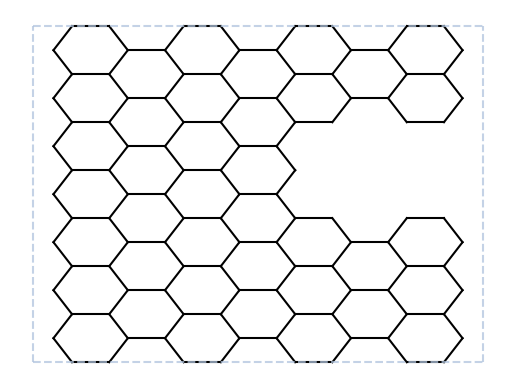

In [3]:
lattice = get_lattice_object(lattice_setup, lattice_setup['seed'])
lattice.delete_node(71)
lattice.delete_node(70)
lattice.delete_node(69)

lattice.delete_node(76)
lattice.delete_node(75)
lattice.delete_node(74)

lattice.delete_node(63)
lattice.delete_node(62)
lattice.delete_node(61)

upper = [78,77]
lower = [55,54]

lattice.draw_lattice()

#### Use this base lattice and inverse design a grabbing tool
I.e., force is only applied to the four left top nodes, while the four left bottom nodes are kept fixed. We inverse design the lattice to make a grabbing motion with the right part in response to this external load.

Checking for crossing edges...


100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:08<00:00, 42.31it/s]
/home/dodo/anaconda3/envs/pylat/lib/python3.8/site-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (
  0%|                                                                                            | 0/60 [00:00<?, ?it/s]

3
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:08<00:00, 41.99it/s]


tensor([[ 0.0043, -0.0044],
        [ 0.0043, -0.0037],
        [ 0.0047, -0.0056],
        [ 0.0047, -0.0052]], grad_fn=<IndexBackward0>) tensor(0.0606, grad_fn=<MulBackward0>) tensor(149., grad_fn=<SumBackward0>)


  2%|█▍                                                                                  | 1/60 [00:17<17:06, 17.40s/it]

tensor([[-0.0010, -0.0140],
        [-0.0010, -0.0154],
        [ 0.0018, -0.0006],
        [ 0.0018, -0.0013]], grad_fn=<IndexBackward0>) tensor(0.0843, grad_fn=<MulBackward0>) tensor(182., grad_fn=<SumBackward0>)


  3%|██▊                                                                                 | 2/60 [00:25<11:32, 11.93s/it]

tensor([[-0.0012, -0.0143],
        [-0.0012, -0.0159],
        [ 0.0013,  0.0002],
        [ 0.0013, -0.0007]], grad_fn=<IndexBackward0>) tensor(0.0843, grad_fn=<MulBackward0>) tensor(182., grad_fn=<SumBackward0>)


  5%|████▏                                                                               | 3/60 [00:33<09:47, 10.30s/it]

tensor([[-0.0028, -0.0177],
        [-0.0028, -0.0205],
        [-0.0032,  0.0034],
        [-0.0032,  0.0022]], grad_fn=<IndexBackward0>) tensor(0.0934, grad_fn=<MulBackward0>) tensor(194., grad_fn=<SumBackward0>)


  7%|█████▌                                                                              | 4/60 [00:41<08:44,  9.36s/it]

tensor([[-0.0026, -0.0178],
        [-0.0027, -0.0206],
        [-0.0033,  0.0038],
        [-0.0033,  0.0026]], grad_fn=<IndexBackward0>) tensor(0.0950, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


  8%|███████                                                                             | 5/60 [00:50<08:30,  9.28s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:07<00:00, 47.90it/s]


tensor([[-0.0027, -0.0183],
        [-0.0028, -0.0213],
        [-0.0035,  0.0048],
        [-0.0035,  0.0035]], grad_fn=<IndexBackward0>) tensor(0.0964, grad_fn=<MulBackward0>) tensor(198., grad_fn=<SumBackward0>)


 10%|████████▍                                                                           | 6/60 [01:06<10:08, 11.26s/it]

tensor([[-0.0024, -0.0182],
        [-0.0025, -0.0212],
        [-0.0034,  0.0051],
        [-0.0034,  0.0038]], grad_fn=<IndexBackward0>) tensor(0.0964, grad_fn=<MulBackward0>) tensor(198., grad_fn=<SumBackward0>)


 12%|█████████▊                                                                          | 7/60 [01:15<09:17, 10.52s/it]/home/dodo/git/materials/pylattice2d/pyLattice2D/utils/draw.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


tensor([[-0.0021, -0.0180],
        [-0.0021, -0.0209],
        [-0.0033,  0.0053],
        [-0.0033,  0.0041]], grad_fn=<IndexBackward0>) tensor(0.0965, grad_fn=<MulBackward0>) tensor(198., grad_fn=<SumBackward0>)


 13%|███████████▏                                                                        | 8/60 [01:23<08:34,  9.89s/it]

tensor([[-0.0017, -0.0178],
        [-0.0018, -0.0206],
        [-0.0031,  0.0055],
        [-0.0031,  0.0042]], grad_fn=<IndexBackward0>) tensor(0.0965, grad_fn=<MulBackward0>) tensor(198., grad_fn=<SumBackward0>)


 15%|████████████▌                                                                       | 9/60 [01:32<08:02,  9.46s/it]

tensor([[-0.0013, -0.0175],
        [-0.0014, -0.0202],
        [-0.0029,  0.0056],
        [-0.0029,  0.0044]], grad_fn=<IndexBackward0>) tensor(0.0965, grad_fn=<MulBackward0>) tensor(198., grad_fn=<SumBackward0>)


 17%|█████████████▊                                                                     | 10/60 [01:41<07:49,  9.38s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:07<00:00, 47.56it/s]


tensor([[-0.0008, -0.0167],
        [-0.0009, -0.0193],
        [-0.0025,  0.0053],
        [-0.0025,  0.0042]], grad_fn=<IndexBackward0>) tensor(0.0950, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 18%|███████████████▏                                                                   | 11/60 [01:57<09:19, 11.41s/it]

tensor([[-0.0006, -0.0167],
        [-0.0006, -0.0192],
        [-0.0024,  0.0054],
        [-0.0024,  0.0043]], grad_fn=<IndexBackward0>) tensor(0.0950, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 20%|████████████████▌                                                                  | 12/60 [02:05<08:22, 10.47s/it]

tensor([[-0.0004, -0.0168],
        [-0.0004, -0.0193],
        [-0.0023,  0.0056],
        [-0.0023,  0.0045]], grad_fn=<IndexBackward0>) tensor(0.0950, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 22%|█████████████████▉                                                                 | 13/60 [02:13<07:37,  9.74s/it]

tensor([[-0.0003, -0.0170],
        [-0.0003, -0.0196],
        [-0.0023,  0.0059],
        [-0.0023,  0.0047]], grad_fn=<IndexBackward0>) tensor(0.0950, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 23%|███████████████████▎                                                               | 14/60 [02:21<07:04,  9.24s/it]

tensor([[-0.0002, -0.0177],
        [-0.0002, -0.0204],
        [-0.0026,  0.0064],
        [-0.0026,  0.0053]], grad_fn=<IndexBackward0>) tensor(0.0957, grad_fn=<MulBackward0>) tensor(197., grad_fn=<SumBackward0>)


 25%|████████████████████▊                                                              | 15/60 [02:31<07:05,  9.45s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:08<00:00, 41.14it/s]


tensor([[-0.0002, -0.0178],
        [-0.0002, -0.0204],
        [-0.0024,  0.0066],
        [-0.0024,  0.0054]], grad_fn=<IndexBackward0>) tensor(0.0943, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 27%|██████████████████████▏                                                            | 16/60 [02:49<08:46, 11.98s/it]

tensor([[-7.8943e-05, -1.7938e-02],
        [-1.1452e-04, -2.0580e-02],
        [-2.3381e-03,  6.8320e-03],
        [-2.3305e-03,  5.6562e-03]], grad_fn=<IndexBackward0>) tensor(0.0943, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 28%|███████████████████████▌                                                           | 17/60 [02:58<07:52, 10.99s/it]

tensor([[ 6.7024e-05, -1.8045e-02],
        [ 3.1562e-05, -2.0685e-02],
        [-2.2937e-03,  7.0346e-03],
        [-2.2860e-03,  5.8520e-03]], grad_fn=<IndexBackward0>) tensor(0.0944, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 30%|████████████████████████▉                                                          | 18/60 [03:06<07:10, 10.24s/it]

tensor([[ 0.0001, -0.0182],
        [ 0.0001, -0.0208],
        [-0.0022,  0.0073],
        [-0.0022,  0.0061]], grad_fn=<IndexBackward0>) tensor(0.0951, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 32%|██████████████████████████▎                                                        | 19/60 [03:17<07:00, 10.26s/it]

tensor([[ 0.0002, -0.0184],
        [ 0.0001, -0.0211],
        [-0.0023,  0.0076],
        [-0.0022,  0.0064]], grad_fn=<IndexBackward0>) tensor(0.0951, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 33%|███████████████████████████▋                                                       | 20/60 [03:26<06:40, 10.02s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:07<00:00, 43.58it/s]


tensor([[ 9.7960e-05, -1.8632e-02],
        [ 6.1401e-05, -2.1309e-02],
        [-2.3020e-03,  7.9138e-03],
        [-2.2934e-03,  6.6611e-03]], grad_fn=<IndexBackward0>) tensor(0.0944, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 35%|█████████████████████████████                                                      | 21/60 [03:42<07:43, 11.88s/it]

tensor([[ 4.2037e-06, -1.8897e-02],
        [-3.3043e-05, -2.1596e-02],
        [-2.3432e-03,  8.2930e-03],
        [-2.3341e-03,  7.0032e-03]], grad_fn=<IndexBackward0>) tensor(0.0944, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 37%|██████████████████████████████▍                                                    | 22/60 [03:51<06:52, 10.85s/it]

tensor([[-9.0480e-05, -1.9149e-02],
        [-1.2834e-04, -2.1867e-02],
        [-2.3839e-03,  8.6863e-03],
        [-2.3742e-03,  7.3586e-03]], grad_fn=<IndexBackward0>) tensor(0.0945, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 38%|███████████████████████████████▊                                                   | 23/60 [03:59<06:13, 10.10s/it]

tensor([[-0.0001, -0.0193],
        [-0.0002, -0.0220],
        [-0.0024,  0.0091],
        [-0.0024,  0.0077]], grad_fn=<IndexBackward0>) tensor(0.0945, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 40%|█████████████████████████████████▏                                                 | 24/60 [04:08<05:47,  9.65s/it]

tensor([[-0.0002, -0.0195],
        [-0.0002, -0.0222],
        [-0.0024,  0.0094],
        [-0.0024,  0.0080]], grad_fn=<IndexBackward0>) tensor(0.0945, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 42%|██████████████████████████████████▌                                                | 25/60 [04:17<05:30,  9.45s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:07<00:00, 44.12it/s]


tensor([[-0.0008, -0.0195],
        [-0.0008, -0.0220],
        [-0.0033,  0.0064],
        [-0.0033,  0.0053]], grad_fn=<IndexBackward0>) tensor(0.0950, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 43%|███████████████████████████████████▉                                               | 26/60 [04:33<06:31, 11.53s/it]

tensor([[-0.0008, -0.0195],
        [-0.0008, -0.0220],
        [-0.0033,  0.0066],
        [-0.0033,  0.0055]], grad_fn=<IndexBackward0>) tensor(0.0950, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 45%|█████████████████████████████████████▎                                             | 27/60 [04:41<05:46, 10.51s/it]

tensor([[-0.0007, -0.0195],
        [-0.0007, -0.0220],
        [-0.0033,  0.0069],
        [-0.0033,  0.0057]], grad_fn=<IndexBackward0>) tensor(0.0950, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 47%|██████████████████████████████████████▋                                            | 28/60 [04:49<05:12,  9.76s/it]

tensor([[ 0.0002, -0.0195],
        [ 0.0001, -0.0222],
        [-0.0024,  0.0106],
        [-0.0023,  0.0091]], grad_fn=<IndexBackward0>) tensor(0.0954, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 48%|████████████████████████████████████████                                           | 29/60 [04:57<04:47,  9.27s/it]

tensor([[ 0.0002, -0.0196],
        [ 0.0002, -0.0223],
        [-0.0024,  0.0109],
        [-0.0024,  0.0094]], grad_fn=<IndexBackward0>) tensor(0.0955, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 50%|█████████████████████████████████████████▌                                         | 30/60 [05:06<04:34,  9.15s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:07<00:00, 46.28it/s]


tensor([[-0.0009, -0.0184],
        [-0.0009, -0.0203],
        [-0.0027,  0.0064],
        [-0.0026,  0.0050]], grad_fn=<IndexBackward0>) tensor(0.0955, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 52%|██████████████████████████████████████████▉                                        | 31/60 [05:22<05:24, 11.21s/it]

tensor([[-0.0009, -0.0184],
        [-0.0009, -0.0202],
        [-0.0027,  0.0069],
        [-0.0027,  0.0055]], grad_fn=<IndexBackward0>) tensor(0.0962, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 53%|████████████████████████████████████████████▎                                      | 32/60 [05:31<04:58, 10.65s/it]

tensor([[-0.0008, -0.0184],
        [-0.0008, -0.0202],
        [-0.0027,  0.0076],
        [-0.0027,  0.0060]], grad_fn=<IndexBackward0>) tensor(0.0963, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 55%|█████████████████████████████████████████████▋                                     | 33/60 [05:41<04:42, 10.46s/it]

tensor([[-7.7887e-06, -1.8811e-02],
        [-2.9159e-05, -2.0939e-02],
        [-1.2267e-03,  1.1378e-02],
        [-1.2147e-03,  9.9064e-03]], grad_fn=<IndexBackward0>) tensor(0.0972, grad_fn=<MulBackward0>) tensor(198., grad_fn=<SumBackward0>)


 57%|███████████████████████████████████████████████                                    | 34/60 [05:50<04:16,  9.85s/it]

tensor([[-0.0001, -0.0185],
        [-0.0001, -0.0205],
        [-0.0008,  0.0119],
        [-0.0008,  0.0107]], grad_fn=<IndexBackward0>) tensor(0.0960, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 58%|████████████████████████████████████████████████▍                                  | 35/60 [05:58<03:52,  9.31s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:06<00:00, 50.04it/s]


tensor([[-0.0006, -0.0164],
        [-0.0006, -0.0173],
        [-0.0005,  0.0109],
        [-0.0005,  0.0099]], grad_fn=<IndexBackward0>) tensor(0.0950, grad_fn=<MulBackward0>) tensor(194., grad_fn=<SumBackward0>)


 60%|█████████████████████████████████████████████████▊                                 | 36/60 [06:13<04:23, 10.99s/it]

tensor([[-0.0005, -0.0165],
        [-0.0005, -0.0174],
        [-0.0007,  0.0117],
        [-0.0007,  0.0102]], grad_fn=<IndexBackward0>) tensor(0.0956, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 62%|███████████████████████████████████████████████████▏                               | 37/60 [06:22<04:00, 10.44s/it]

tensor([[-0.0005, -0.0168],
        [-0.0005, -0.0178],
        [-0.0008,  0.0121],
        [-0.0008,  0.0106]], grad_fn=<IndexBackward0>) tensor(0.0963, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 63%|████████████████████████████████████████████████████▌                              | 38/60 [06:31<03:41, 10.08s/it]

tensor([[-0.0005, -0.0193],
        [-0.0005, -0.0213],
        [-0.0012,  0.0155],
        [-0.0012,  0.0133]], grad_fn=<IndexBackward0>) tensor(0.0975, grad_fn=<MulBackward0>) tensor(198., grad_fn=<SumBackward0>)


 65%|█████████████████████████████████████████████████████▉                             | 39/60 [06:40<03:25,  9.81s/it]

tensor([[-0.0005, -0.0194],
        [-0.0005, -0.0212],
        [-0.0012,  0.0167],
        [-0.0012,  0.0143]], grad_fn=<IndexBackward0>) tensor(0.0975, grad_fn=<MulBackward0>) tensor(198., grad_fn=<SumBackward0>)


 67%|███████████████████████████████████████████████████████▎                           | 40/60 [06:50<03:12,  9.65s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:07<00:00, 47.58it/s]


tensor([[-0.0006, -0.0190],
        [-0.0006, -0.0207],
        [-0.0014,  0.0189],
        [-0.0014,  0.0161]], grad_fn=<IndexBackward0>) tensor(0.0962, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 68%|████████████████████████████████████████████████████████▋                          | 41/60 [07:05<03:35, 11.34s/it]

tensor([[-0.0008, -0.0187],
        [-0.0008, -0.0202],
        [-0.0012,  0.0204],
        [-0.0012,  0.0174]], grad_fn=<IndexBackward0>) tensor(0.0962, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 70%|██████████████████████████████████████████████████████████                         | 42/60 [07:13<03:07, 10.40s/it]

tensor([[-0.0006, -0.0182],
        [-0.0006, -0.0195],
        [-0.0007,  0.0210],
        [-0.0006,  0.0179]], grad_fn=<IndexBackward0>) tensor(0.0962, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 72%|███████████████████████████████████████████████████████████▍                       | 43/60 [07:22<02:46,  9.80s/it]

tensor([[-8.3930e-06, -1.7943e-02],
        [-1.3379e-05, -1.9259e-02],
        [-1.0527e-04,  2.0857e-02],
        [-5.3380e-05,  1.7782e-02]], grad_fn=<IndexBackward0>) tensor(0.0962, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 73%|████████████████████████████████████████████████████████████▊                      | 44/60 [07:30<02:28,  9.30s/it]

tensor([[ 0.0005, -0.0176],
        [ 0.0005, -0.0189],
        [ 0.0003,  0.0180],
        [ 0.0003,  0.0152]], grad_fn=<IndexBackward0>) tensor(0.0957, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 75%|██████████████████████████████████████████████████████████████▎                    | 45/60 [07:38<02:14,  8.97s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:07<00:00, 47.38it/s]


tensor([[ 0.0006, -0.0187],
        [ 0.0006, -0.0203],
        [-0.0013,  0.0187],
        [-0.0013,  0.0152]], grad_fn=<IndexBackward0>) tensor(0.0959, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 77%|███████████████████████████████████████████████████████████████▋                   | 46/60 [07:54<02:33, 10.97s/it]

tensor([[ 0.0006, -0.0192],
        [ 0.0005, -0.0210],
        [-0.0013,  0.0196],
        [-0.0013,  0.0160]], grad_fn=<IndexBackward0>) tensor(0.0959, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 78%|█████████████████████████████████████████████████████████████████                  | 47/60 [08:02<02:11, 10.14s/it]

tensor([[ 1.5838e-05, -2.0792e-02],
        [-9.5291e-06, -2.3200e-02],
        [-1.1599e-03,  2.0876e-02],
        [-1.0820e-03,  1.7117e-02]], grad_fn=<IndexBackward0>) tensor(0.0966, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 80%|██████████████████████████████████████████████████████████████████▍                | 48/60 [08:10<01:54,  9.53s/it]

tensor([[ 1.2903e-05, -2.0305e-02],
        [-1.0142e-05, -2.2596e-02],
        [ 5.0959e-04,  2.3324e-02],
        [ 5.7893e-04,  1.9766e-02]], grad_fn=<IndexBackward0>) tensor(0.0964, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 82%|███████████████████████████████████████████████████████████████████▊               | 49/60 [08:18<01:40,  9.09s/it]

tensor([[-5.2236e-05, -1.9619e-02],
        [-7.1623e-05, -2.1731e-02],
        [ 7.9140e-04,  2.3776e-02],
        [ 8.6279e-04,  2.0165e-02]], grad_fn=<IndexBackward0>) tensor(0.0965, grad_fn=<MulBackward0>) tensor(196., grad_fn=<SumBackward0>)


 83%|█████████████████████████████████████████████████████████████████████▏             | 50/60 [08:27<01:29,  8.95s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:07<00:00, 46.66it/s]


tensor([[ 0.0002, -0.0184],
        [ 0.0002, -0.0201],
        [ 0.0005,  0.0232],
        [ 0.0006,  0.0195]], grad_fn=<IndexBackward0>) tensor(0.0954, grad_fn=<MulBackward0>) tensor(194., grad_fn=<SumBackward0>)


 85%|██████████████████████████████████████████████████████████████████████▌            | 51/60 [08:42<01:37, 10.80s/it]

tensor([[ 1.0904e-04, -1.8111e-02],
        [ 9.7719e-05, -1.9746e-02],
        [ 8.5326e-04,  2.3108e-02],
        [ 9.2161e-04,  1.9583e-02]], grad_fn=<IndexBackward0>) tensor(0.0954, grad_fn=<MulBackward0>) tensor(194., grad_fn=<SumBackward0>)


 87%|███████████████████████████████████████████████████████████████████████▉           | 52/60 [08:50<01:19,  9.97s/it]

tensor([[-3.7679e-05, -1.8447e-02],
        [-5.1163e-05, -2.0195e-02],
        [ 7.7158e-04,  2.3316e-02],
        [ 8.3821e-04,  1.9835e-02]], grad_fn=<IndexBackward0>) tensor(0.0955, grad_fn=<MulBackward0>) tensor(194., grad_fn=<SumBackward0>)


 88%|█████████████████████████████████████████████████████████████████████████▎         | 53/60 [08:58<01:05,  9.33s/it]

tensor([[-5.4673e-05, -1.8906e-02],
        [-7.1730e-05, -2.0830e-02],
        [ 5.7084e-04,  2.2910e-02],
        [ 6.3567e-04,  1.9470e-02]], grad_fn=<IndexBackward0>) tensor(0.0959, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 90%|██████████████████████████████████████████████████████████████████████████▋        | 54/60 [09:06<00:53,  8.91s/it]

tensor([[-0.0001, -0.0193],
        [-0.0002, -0.0214],
        [ 0.0002,  0.0228],
        [ 0.0003,  0.0194]], grad_fn=<IndexBackward0>) tensor(0.0959, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 92%|████████████████████████████████████████████████████████████████████████████       | 55/60 [09:13<00:43,  8.61s/it]

2
Checking for crossing edges...



100%|█████████████████████████████████████████████████████████████████████████████████| 339/339 [00:07<00:00, 47.48it/s]


tensor([[-2.6621e-04, -1.9629e-02],
        [-2.8803e-04, -2.1768e-02],
        [ 1.3501e-05,  2.3232e-02],
        [ 7.6737e-05,  1.9839e-02]], grad_fn=<IndexBackward0>) tensor(0.0956, grad_fn=<MulBackward0>) tensor(194., grad_fn=<SumBackward0>)


 93%|█████████████████████████████████████████████████████████████████████████████▍     | 56/60 [09:29<00:42, 10.55s/it]

tensor([[-0.0003, -0.0200],
        [-0.0003, -0.0222],
        [-0.0003,  0.0230],
        [-0.0003,  0.0197]], grad_fn=<IndexBackward0>) tensor(0.0956, grad_fn=<MulBackward0>) tensor(194., grad_fn=<SumBackward0>)


 95%|██████████████████████████████████████████████████████████████████████████████▊    | 57/60 [09:37<00:29,  9.89s/it]

tensor([[-3.1253e-05, -1.9369e-02],
        [-5.1030e-05, -2.1388e-02],
        [-3.6303e-04,  2.2548e-02],
        [-3.0525e-04,  1.9305e-02]], grad_fn=<IndexBackward0>) tensor(0.0963, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 97%|████████████████████████████████████████████████████████████████████████████████▏  | 58/60 [09:45<00:18,  9.30s/it]

tensor([[ 5.7998e-05, -1.9093e-02],
        [ 3.9401e-05, -2.1055e-02],
        [-1.4109e-04,  2.1779e-02],
        [-9.0641e-05,  1.8749e-02]], grad_fn=<IndexBackward0>) tensor(0.0963, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


 98%|█████████████████████████████████████████████████████████████████████████████████▌ | 59/60 [09:53<00:08,  8.91s/it]

tensor([[ 1.0675e-04, -1.8737e-02],
        [ 8.9938e-05, -2.0615e-02],
        [ 2.3987e-04,  2.0831e-02],
        [ 2.8165e-04,  1.8074e-02]], grad_fn=<IndexBackward0>) tensor(0.0963, grad_fn=<MulBackward0>) tensor(195., grad_fn=<SumBackward0>)


100%|███████████████████████████████████████████████████████████████████████████████████| 60/60 [10:01<00:00, 10.03s/it]


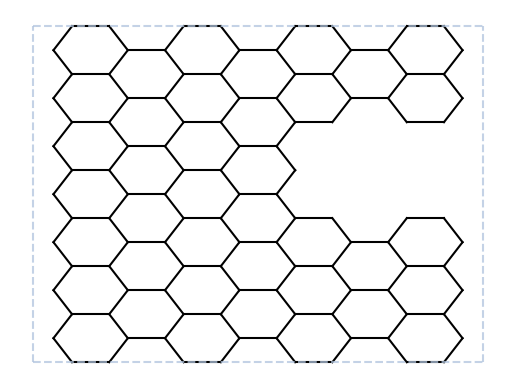

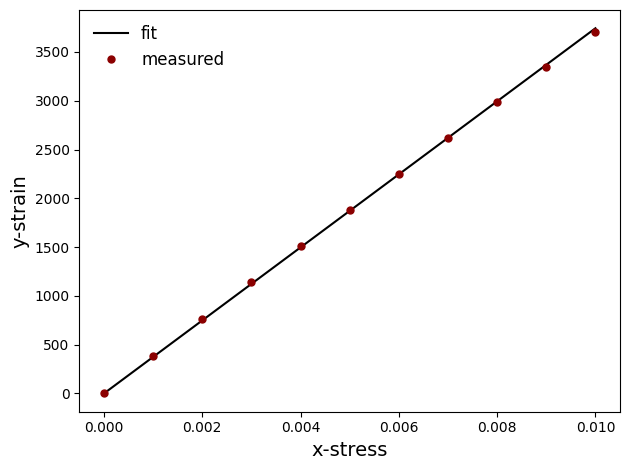

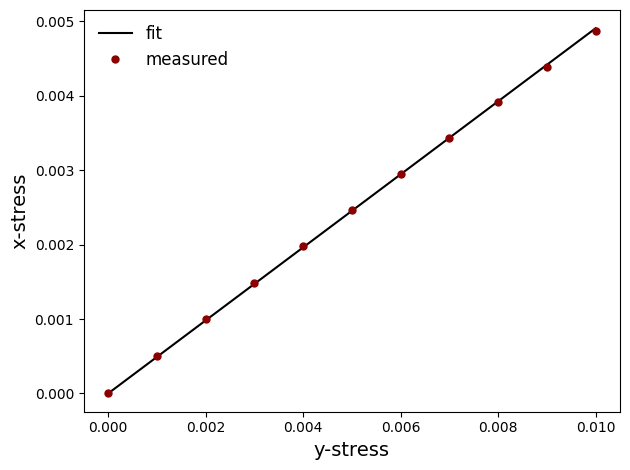

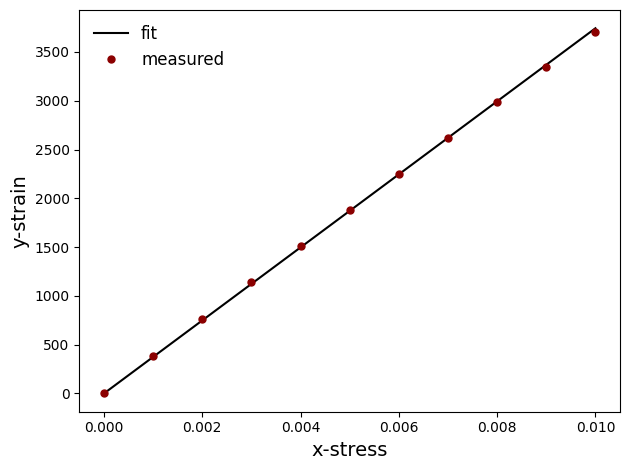

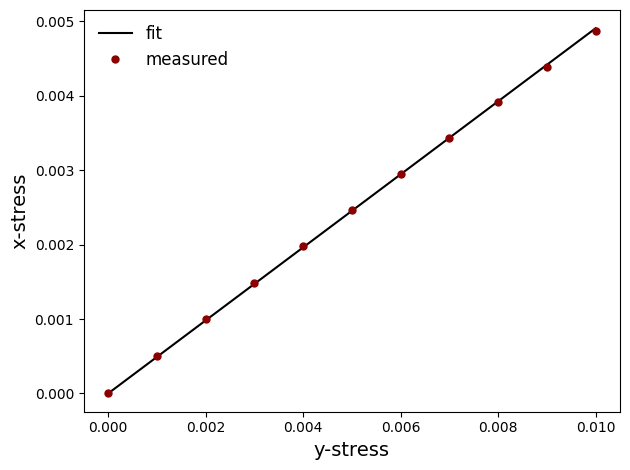

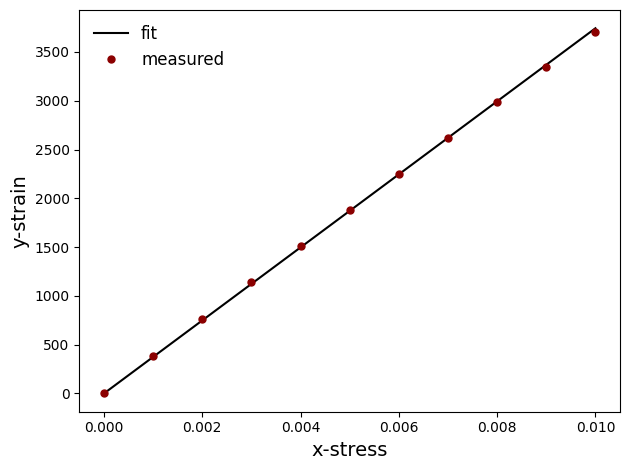

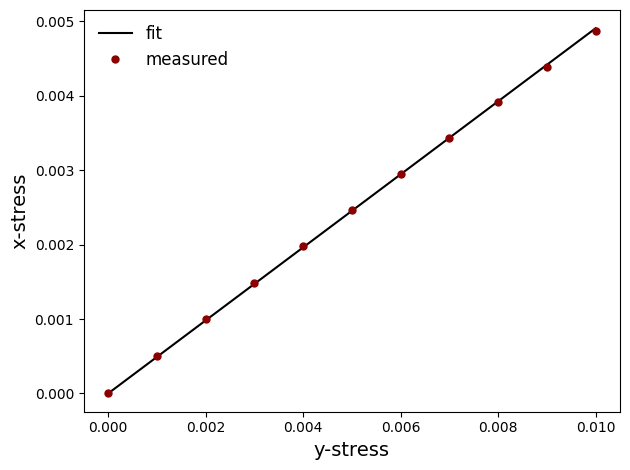

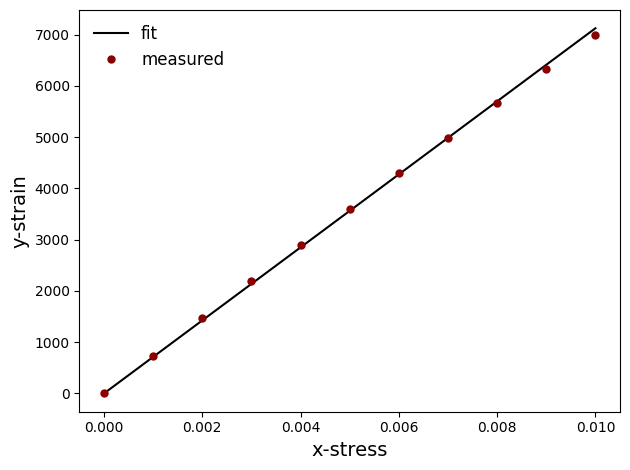

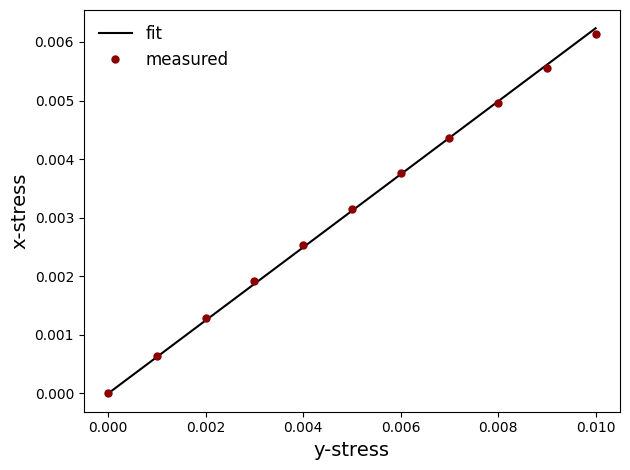

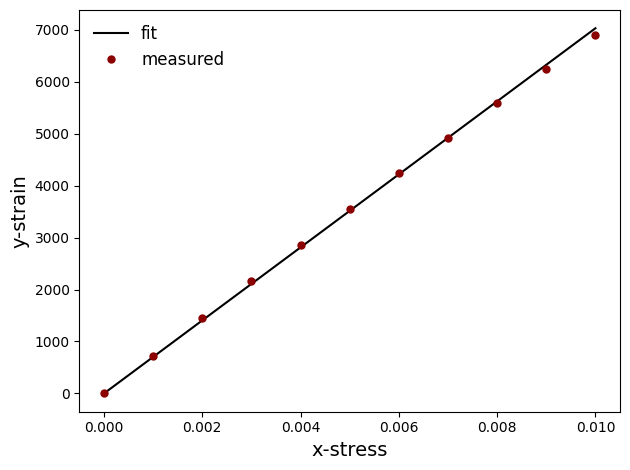

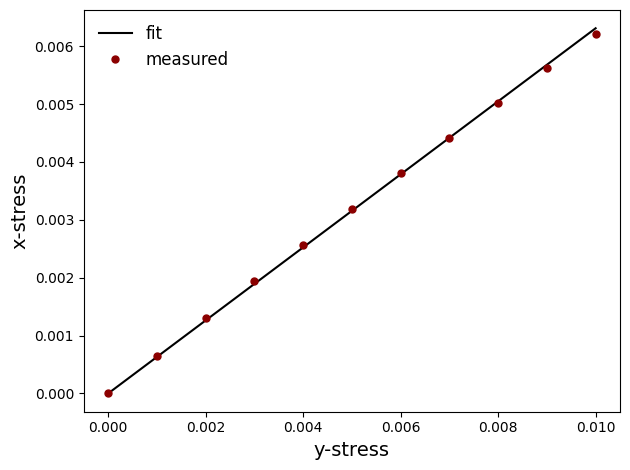

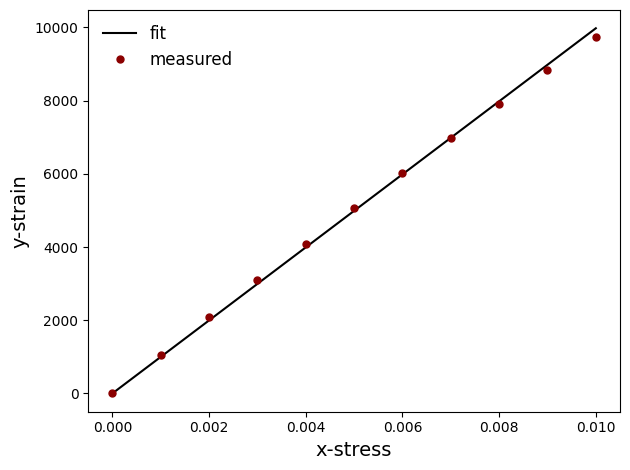

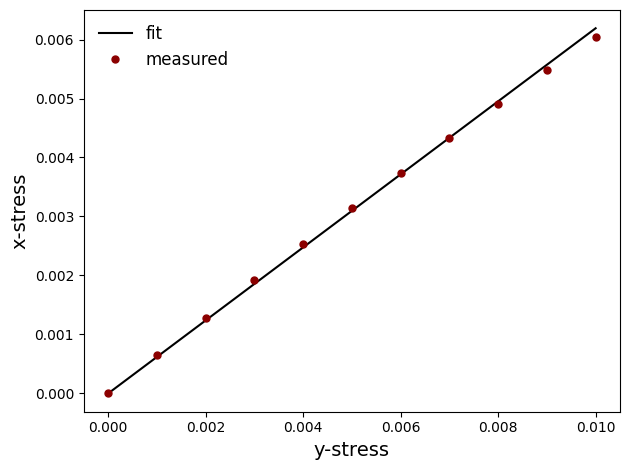

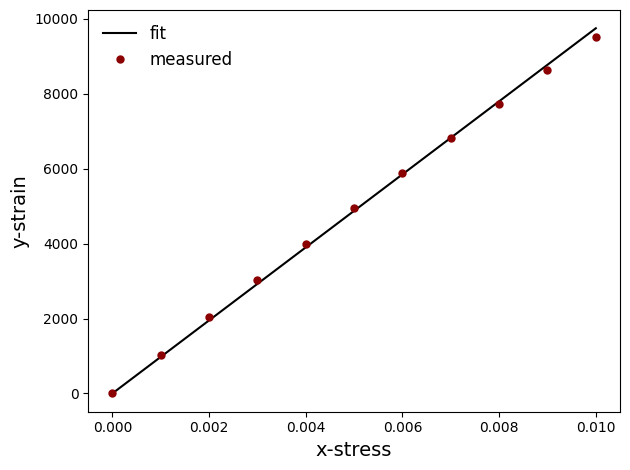

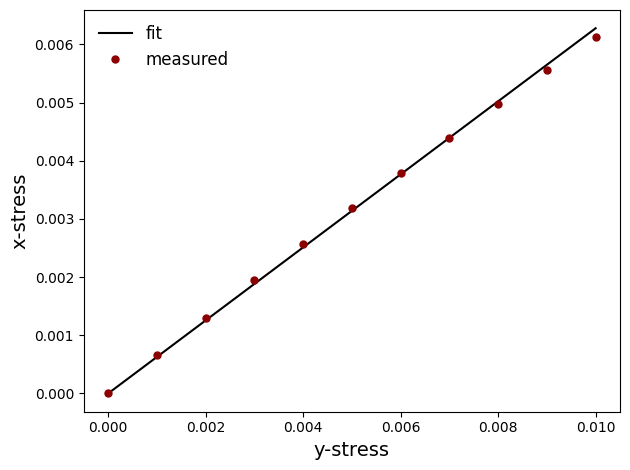

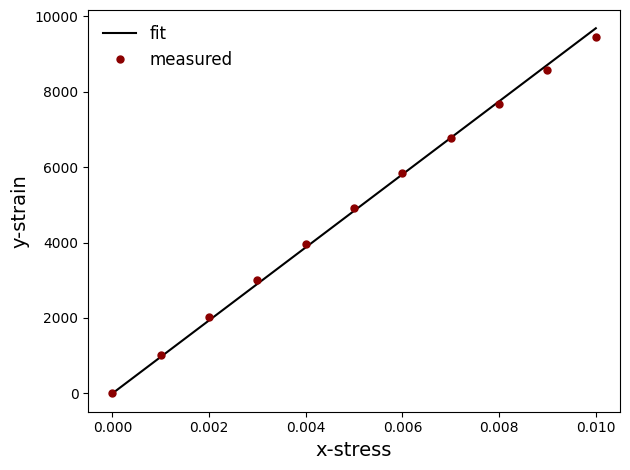

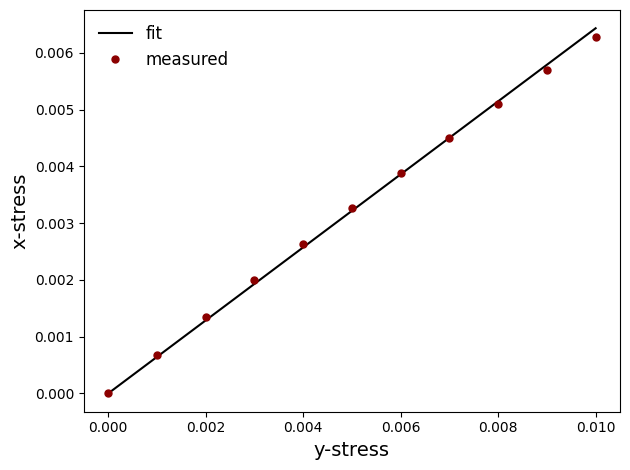

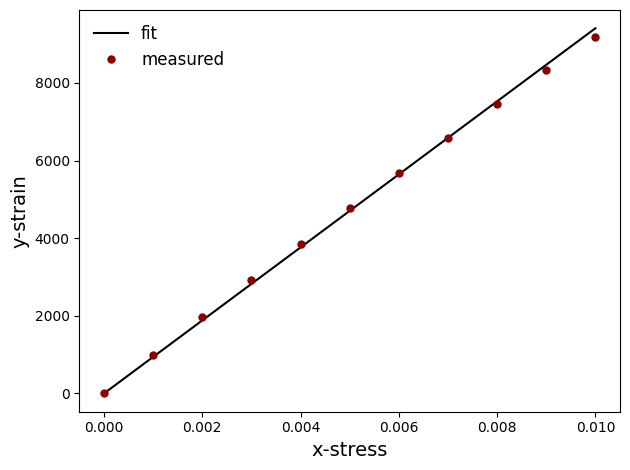

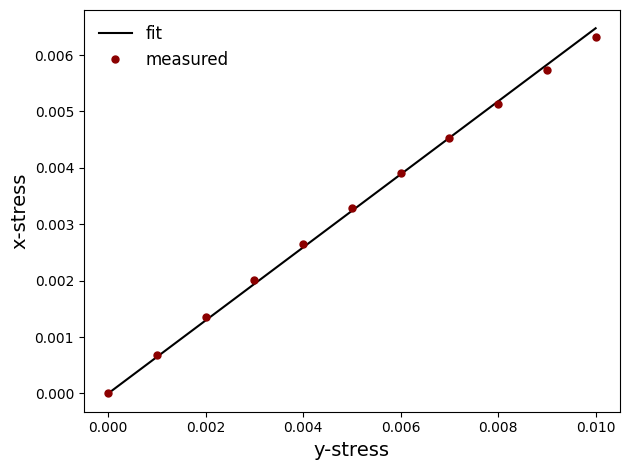

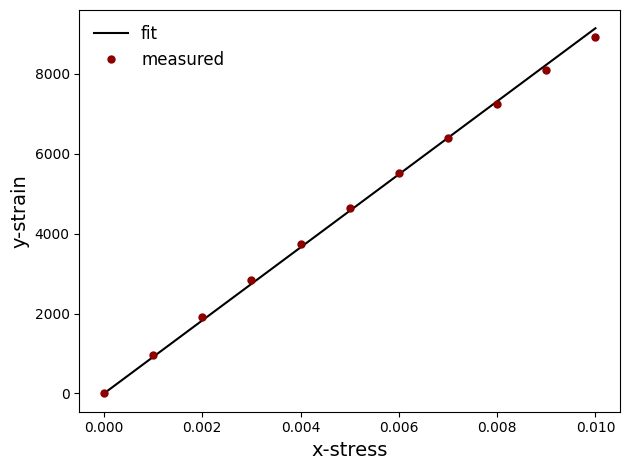

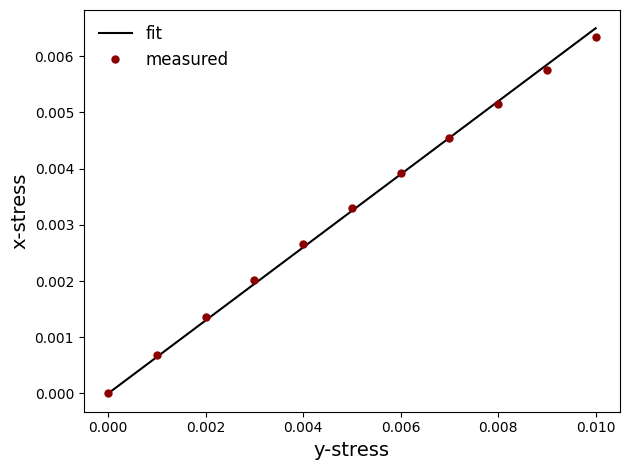

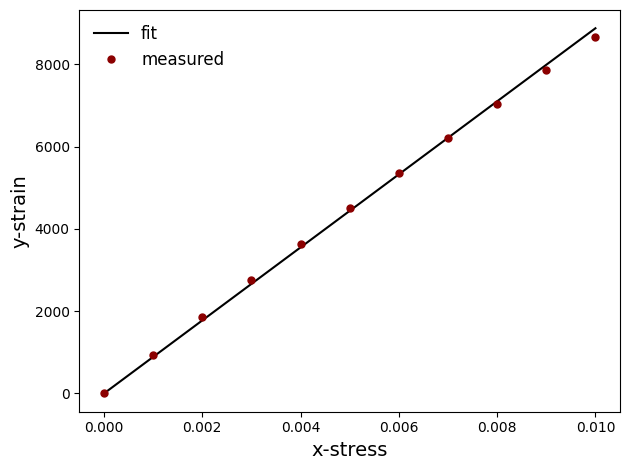

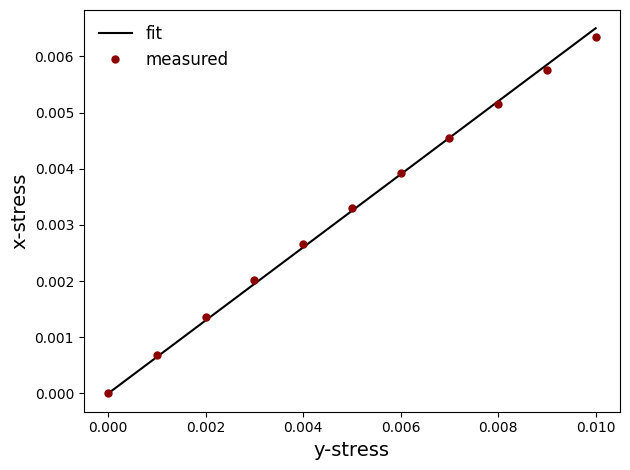

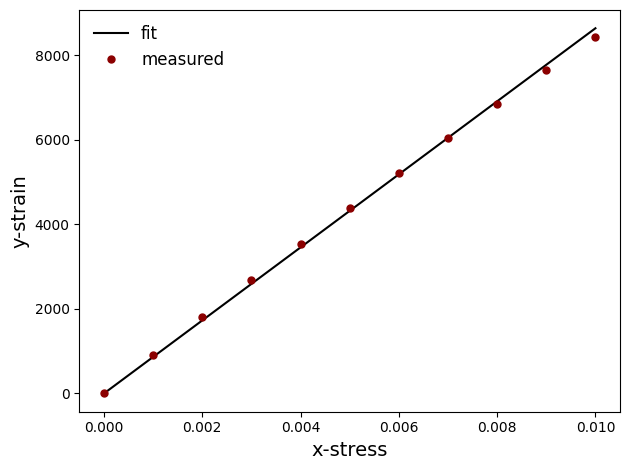

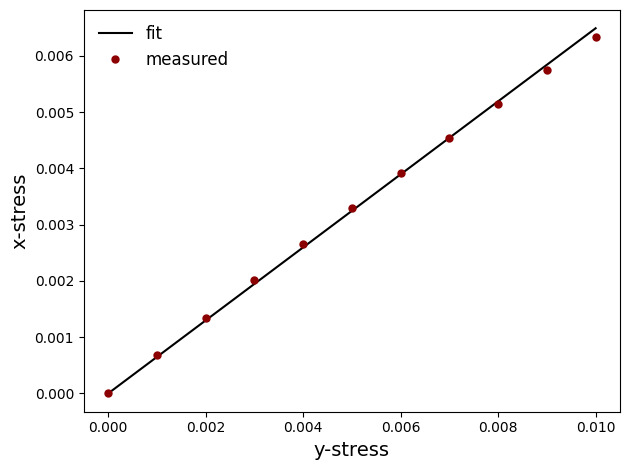

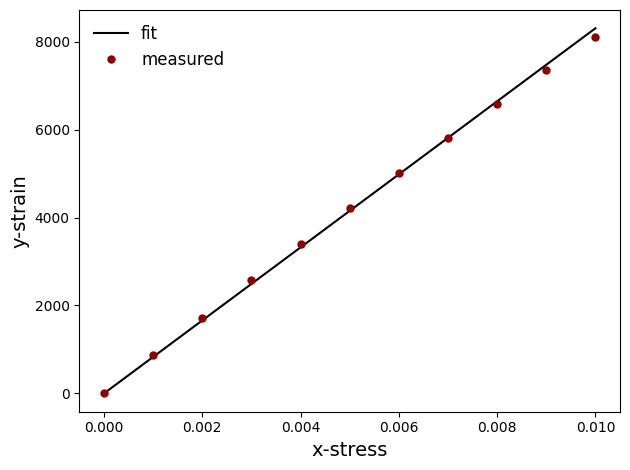

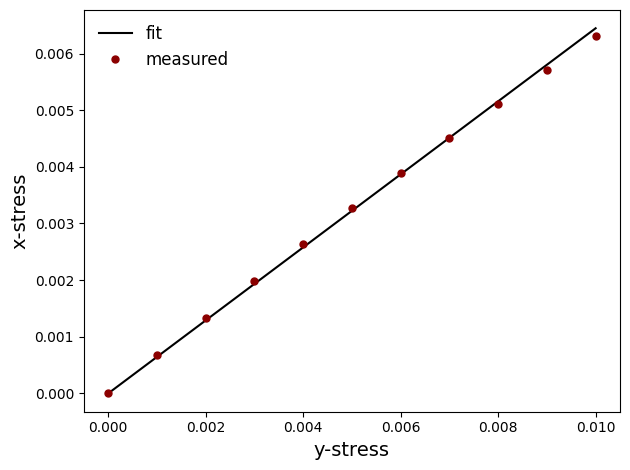

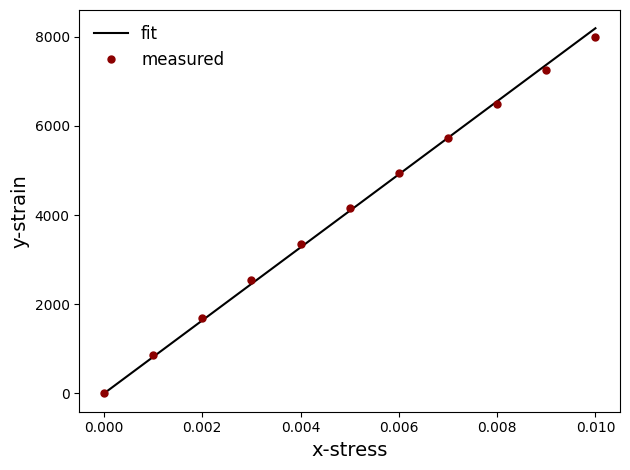

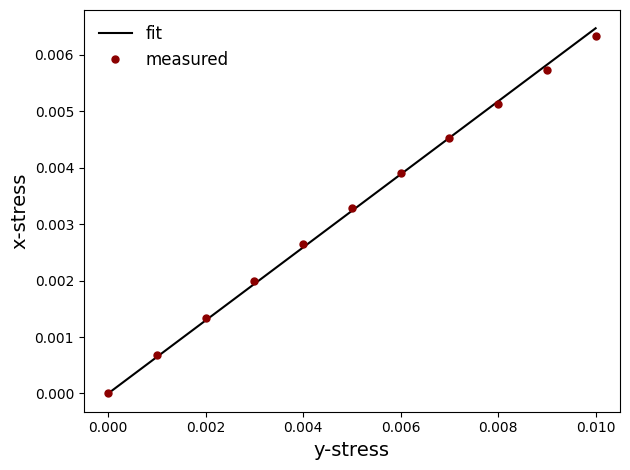

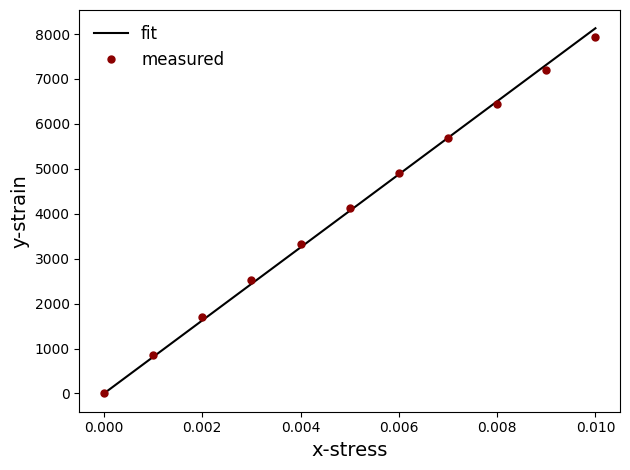

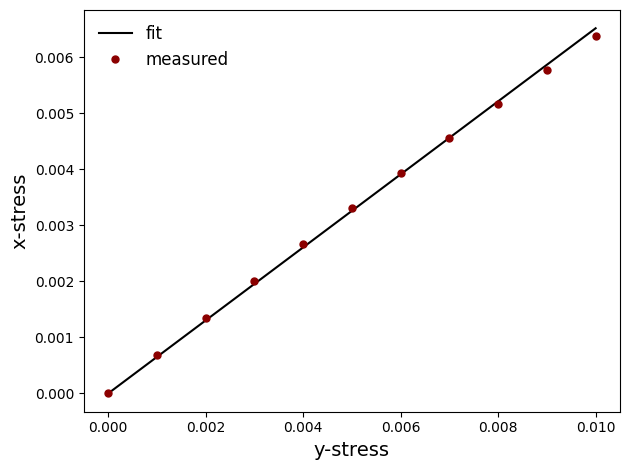

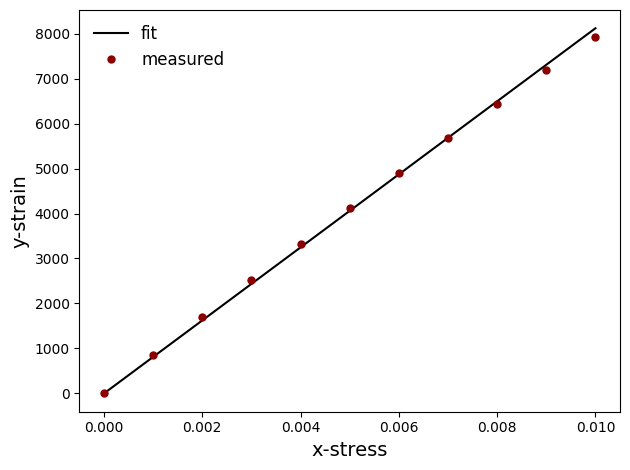

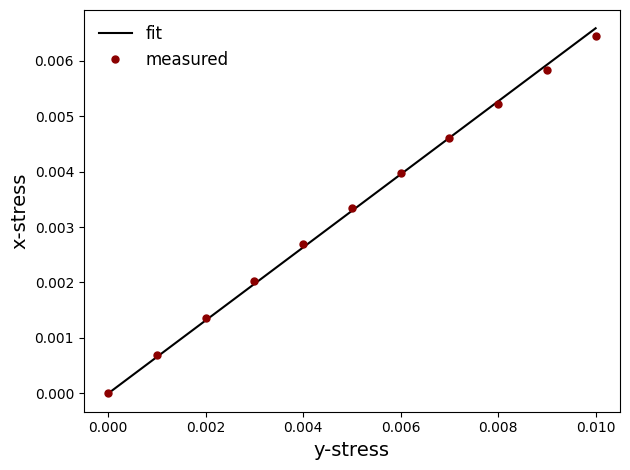

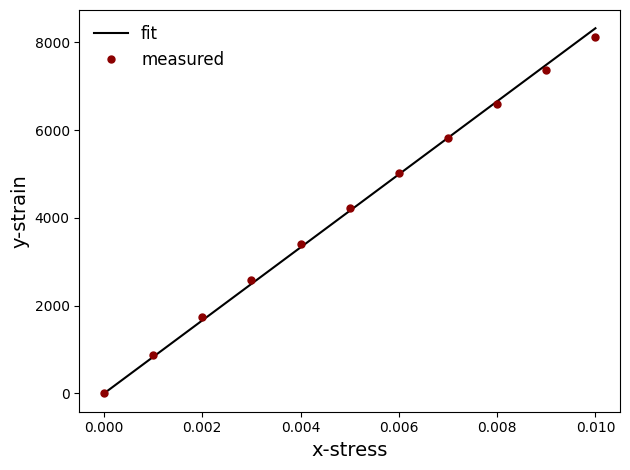

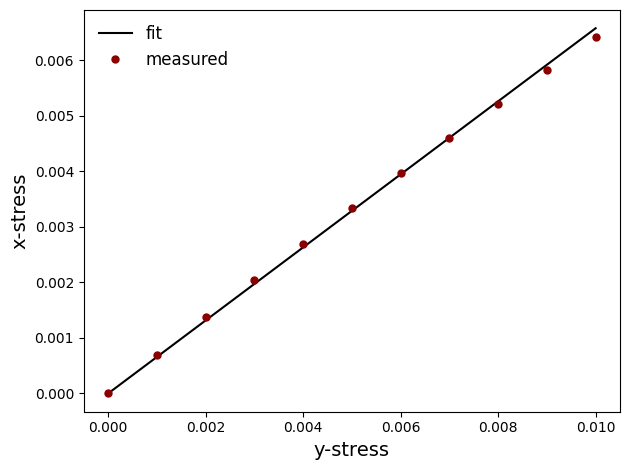

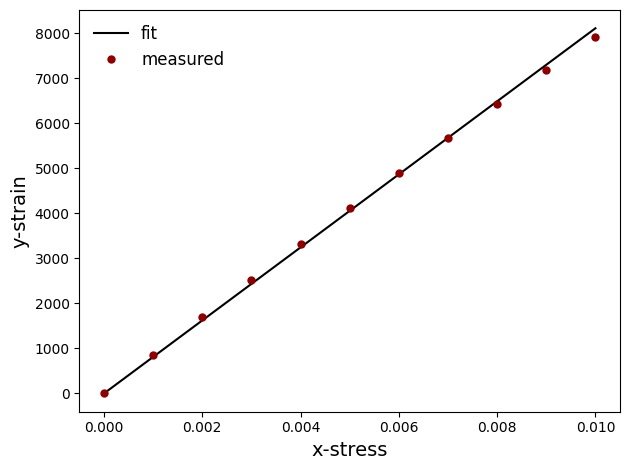

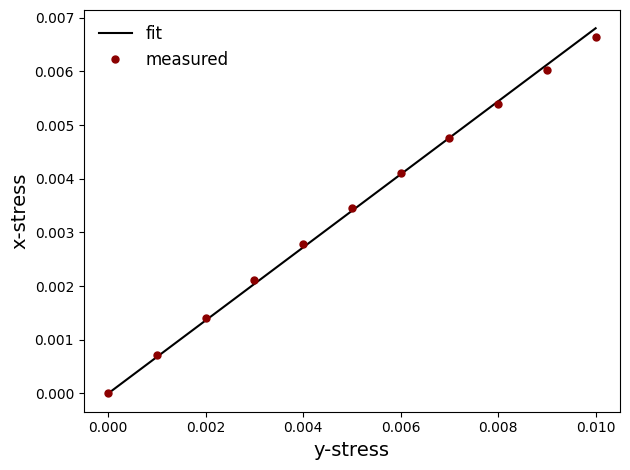

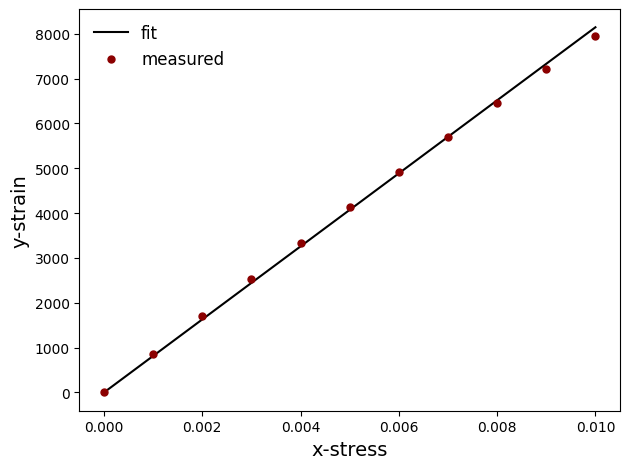

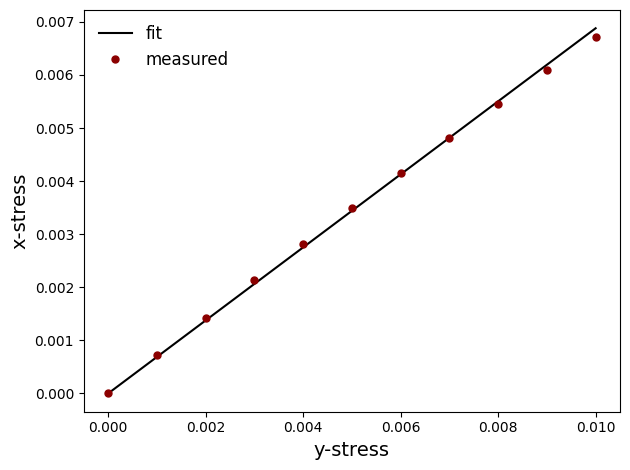

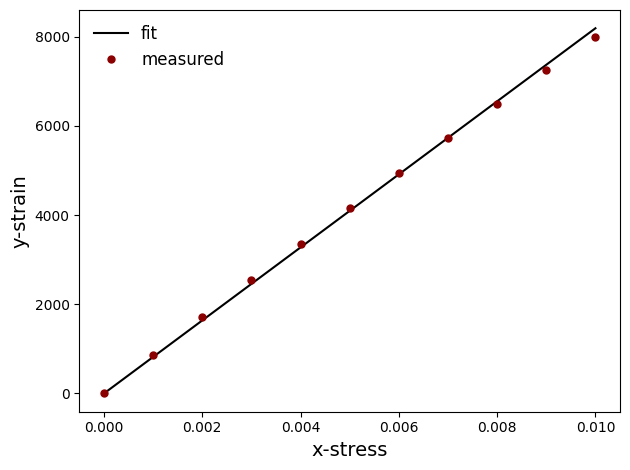

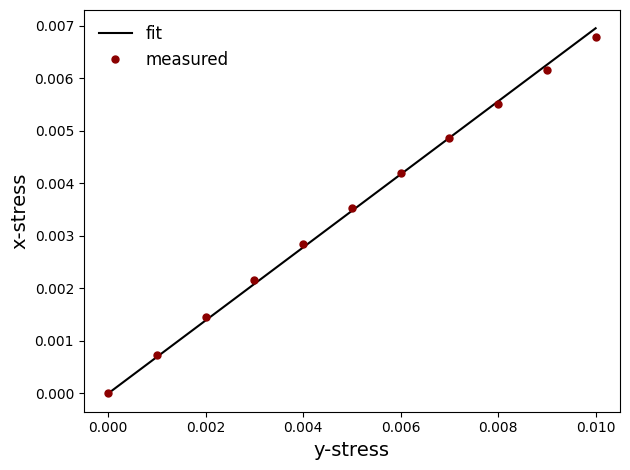

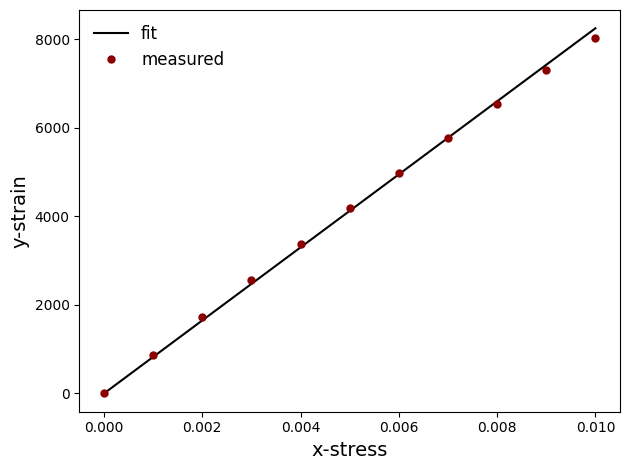

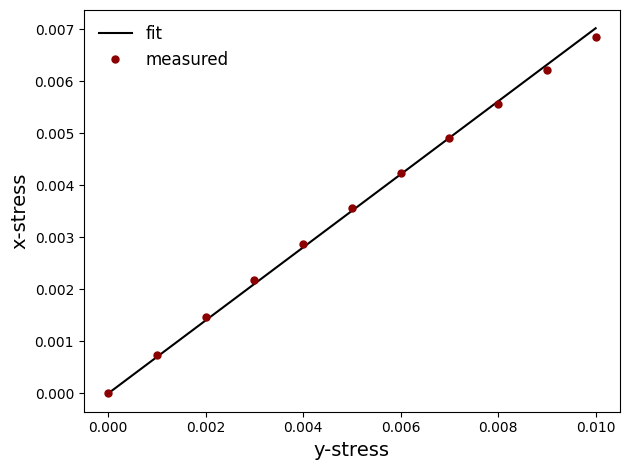

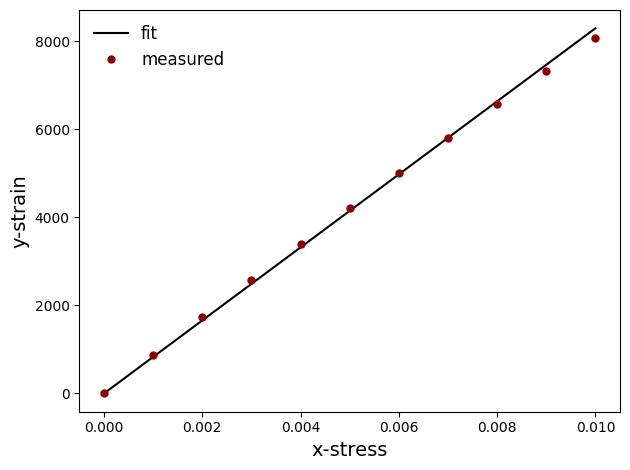

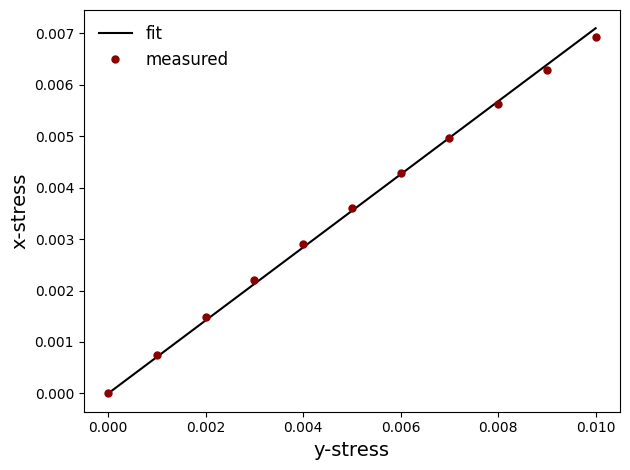

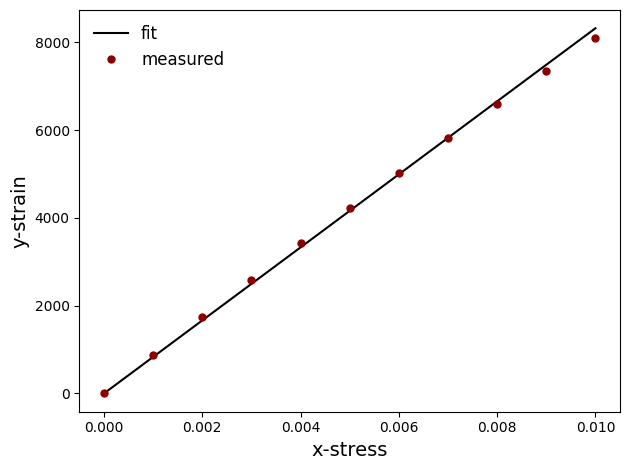

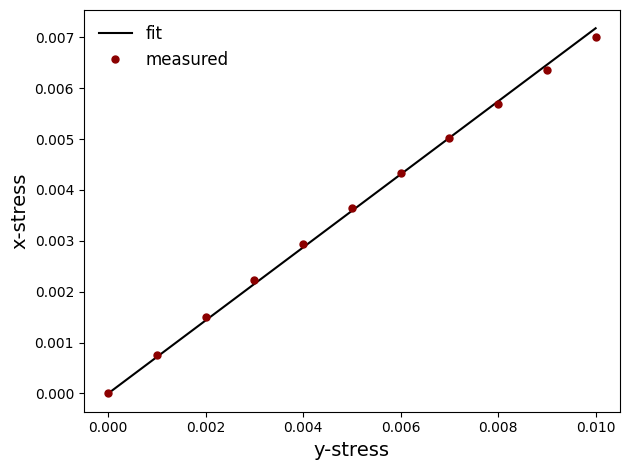

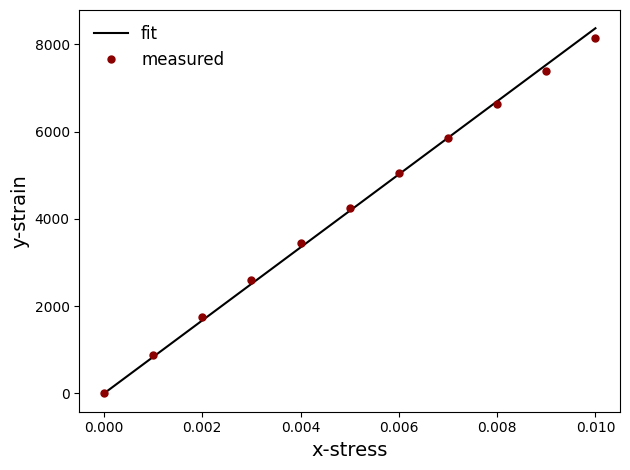

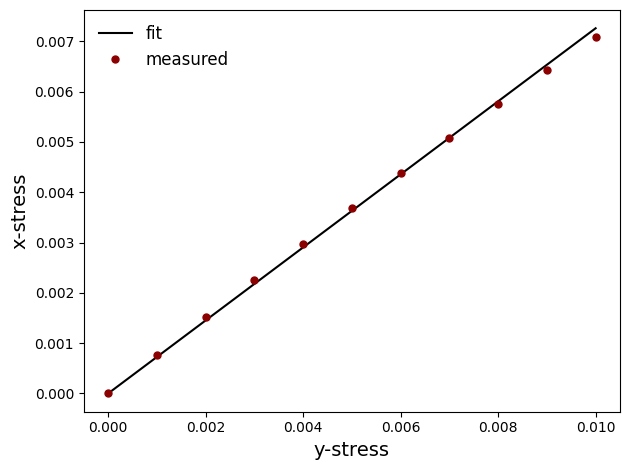

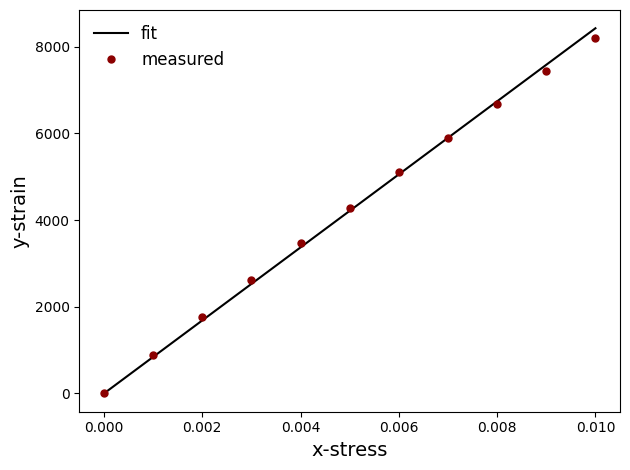

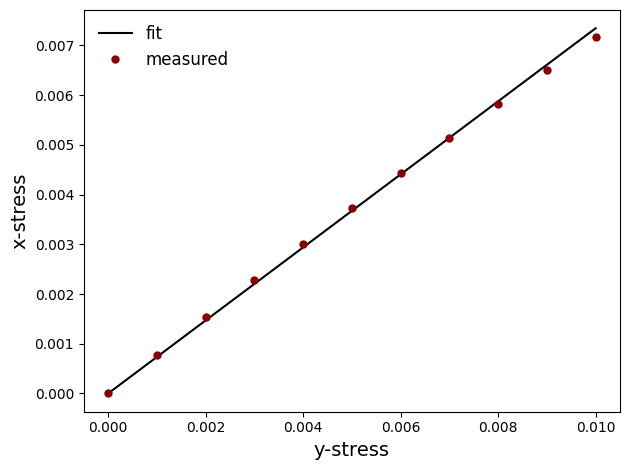

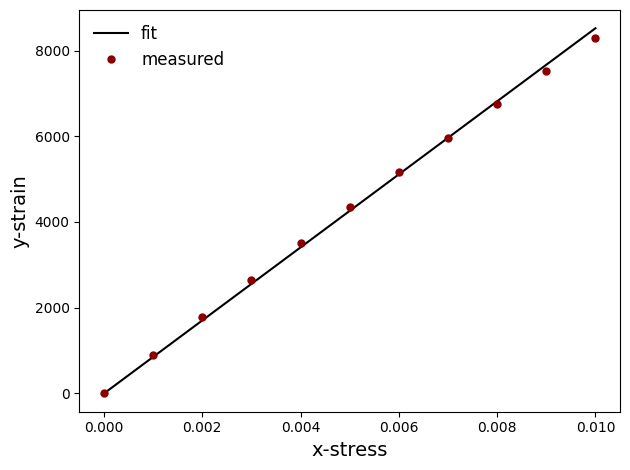

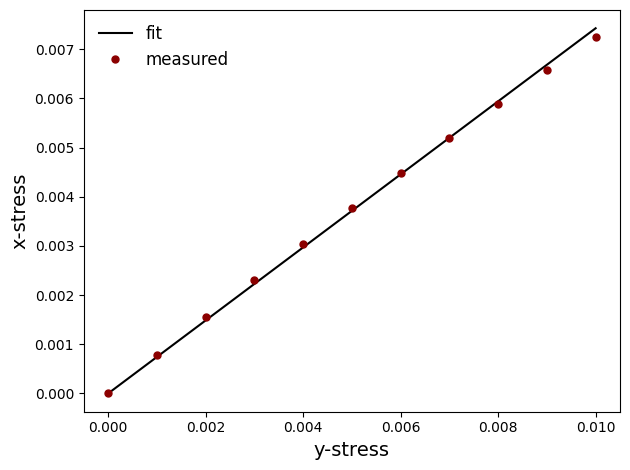

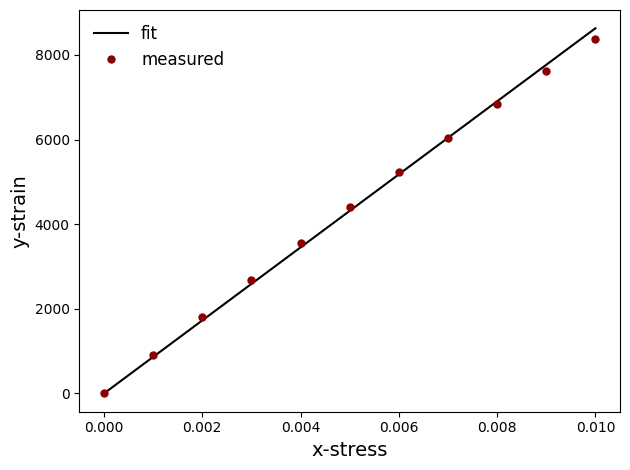

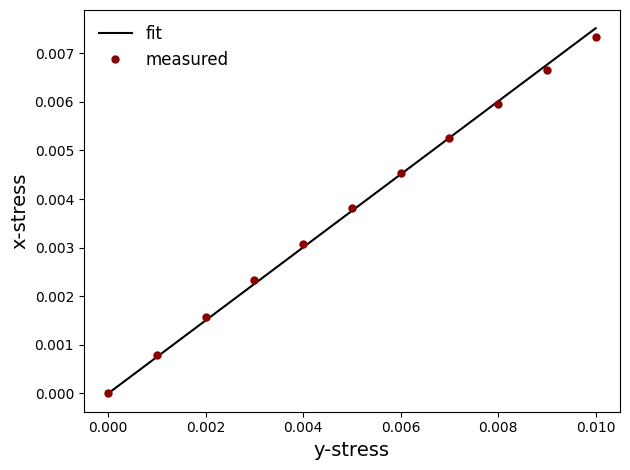

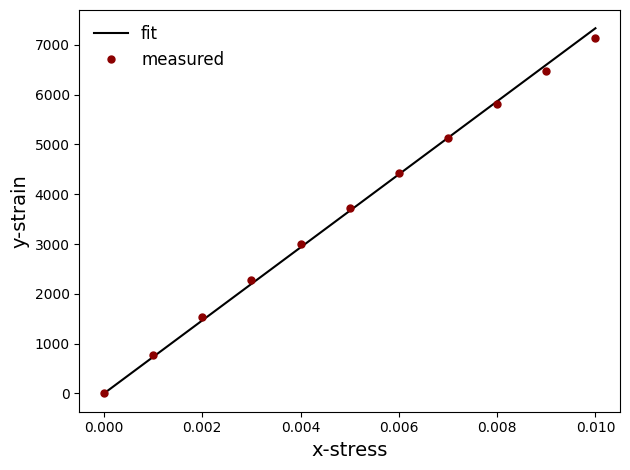

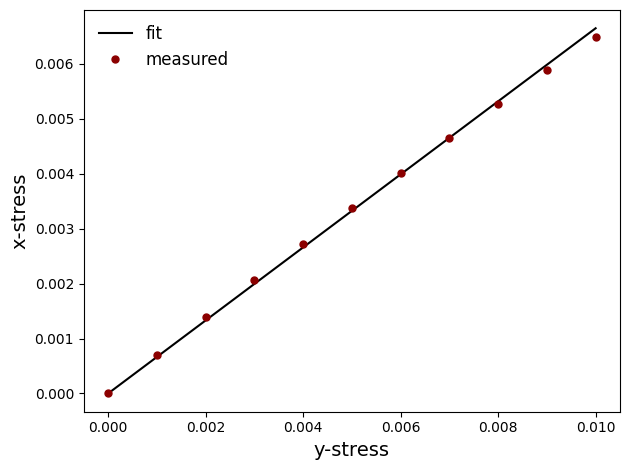

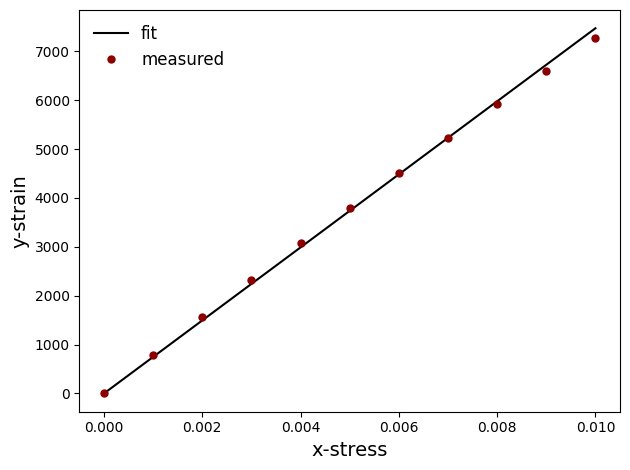

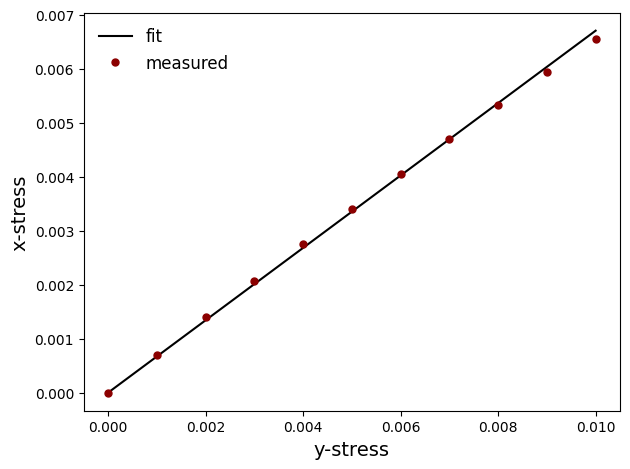

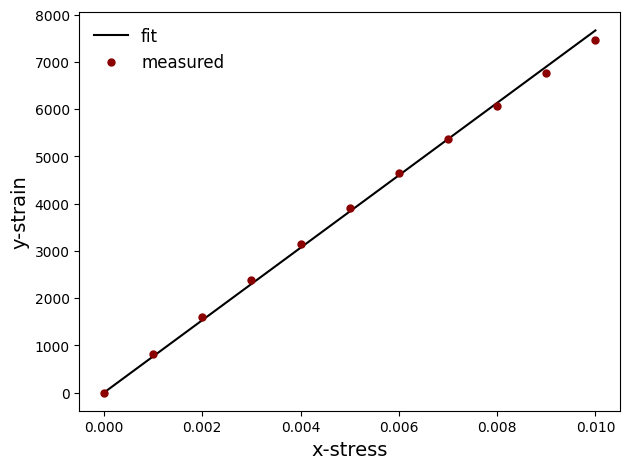

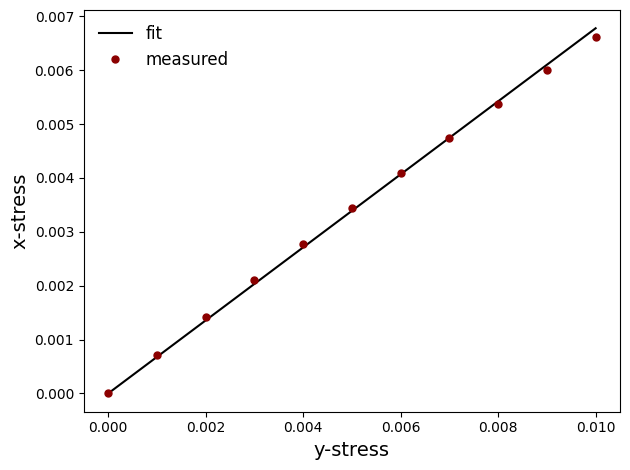

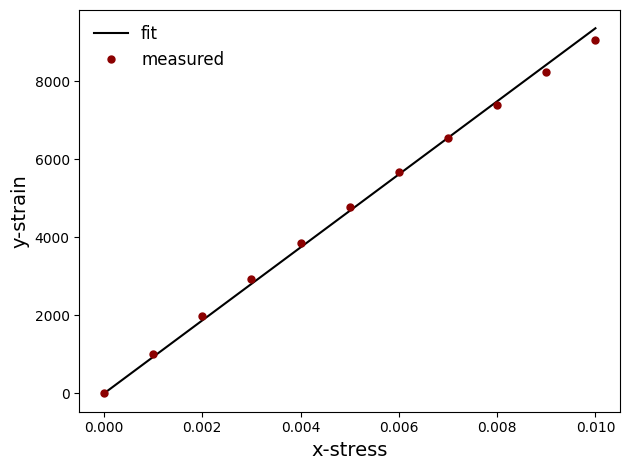

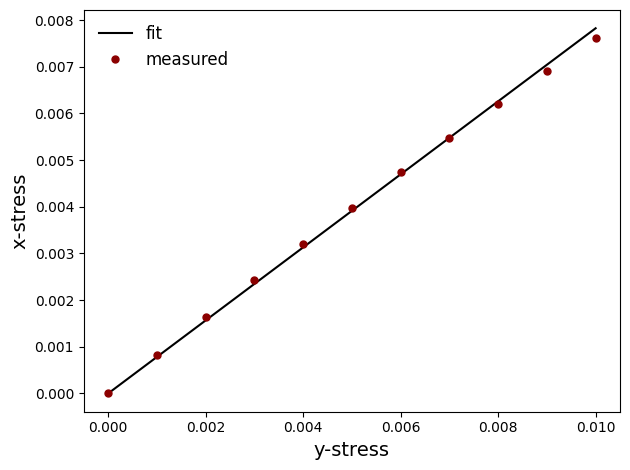

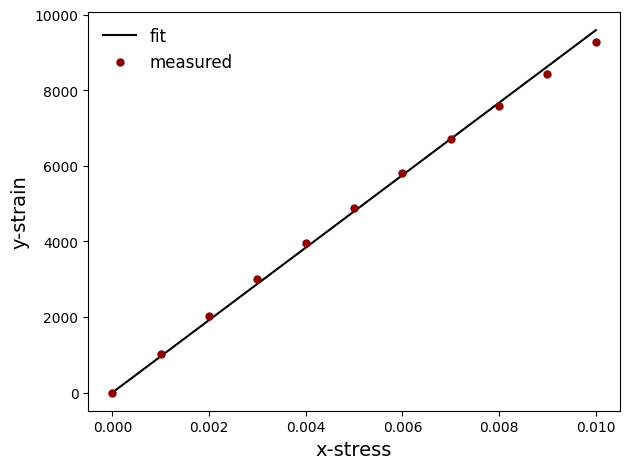

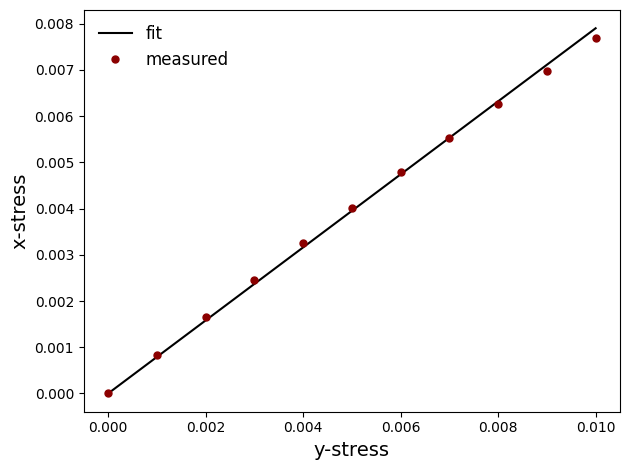

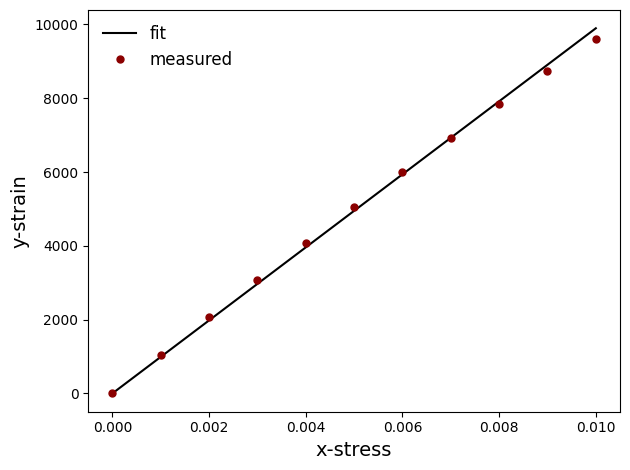

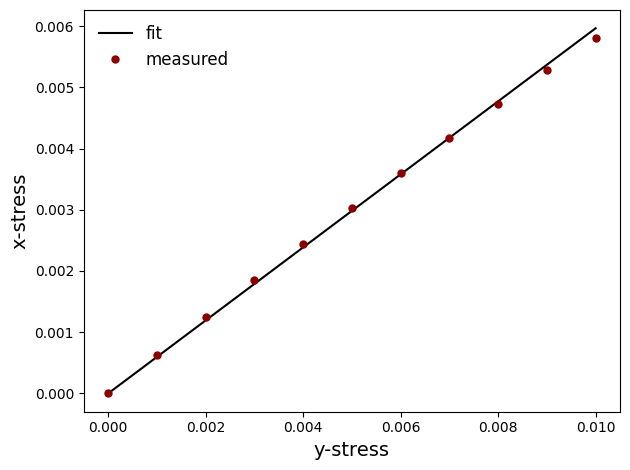

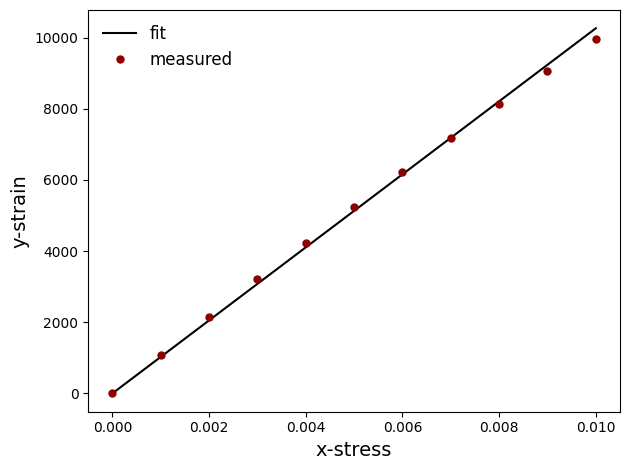

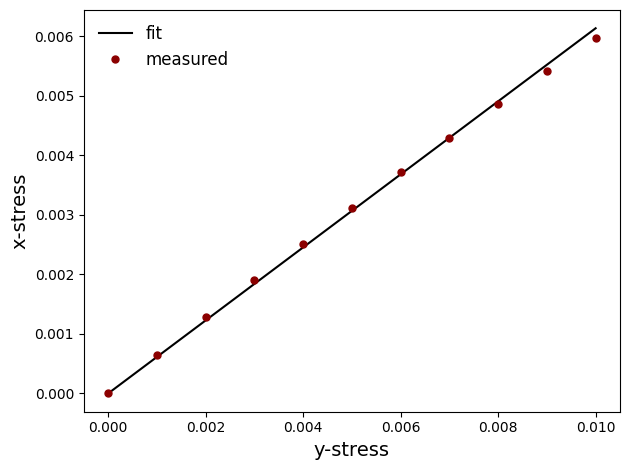

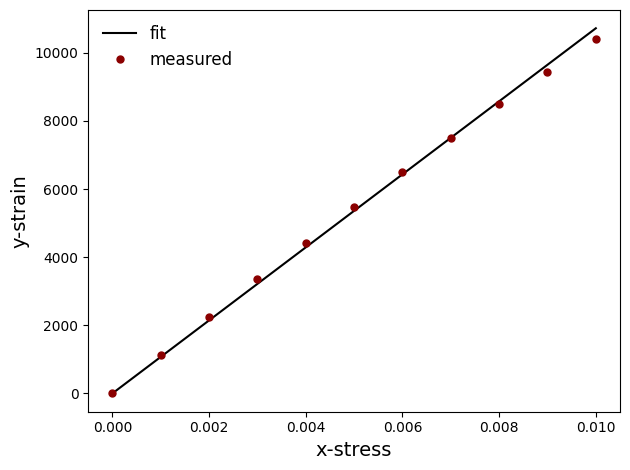

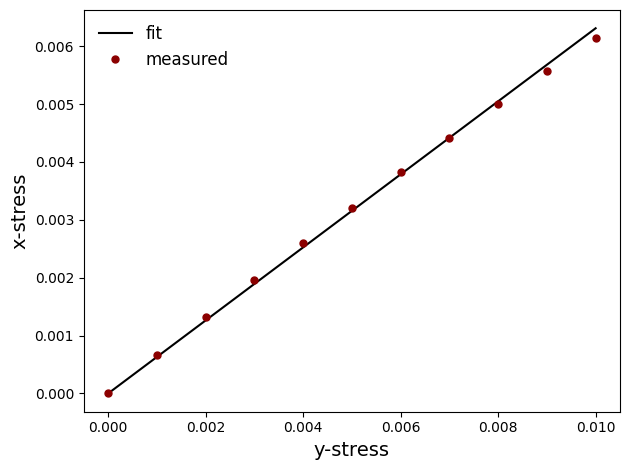

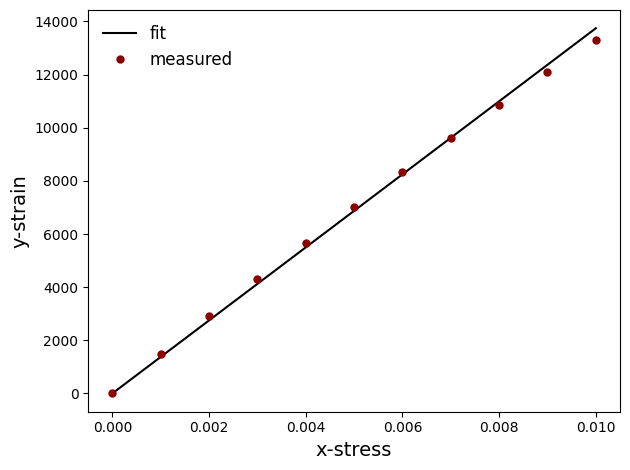

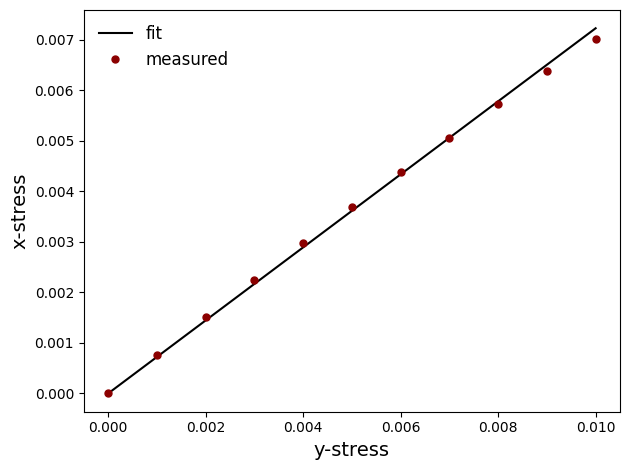

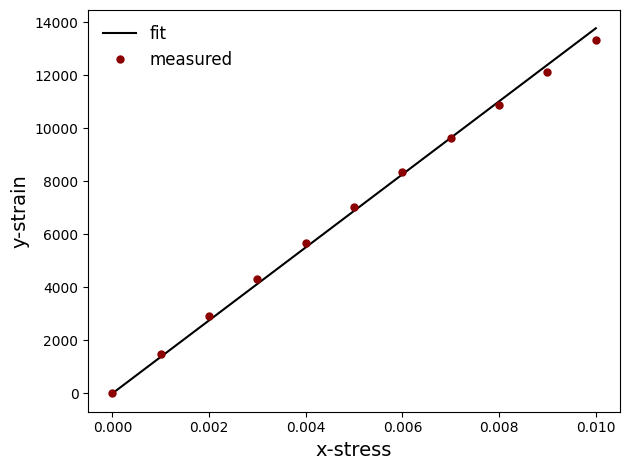

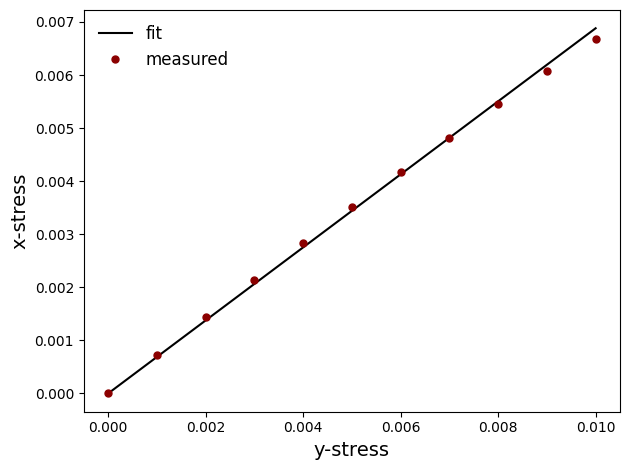

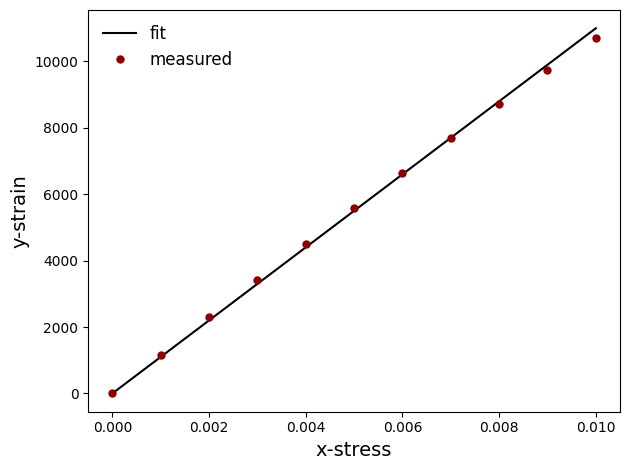

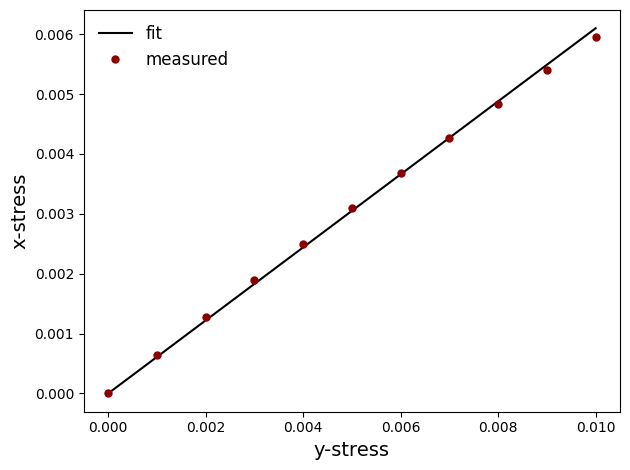

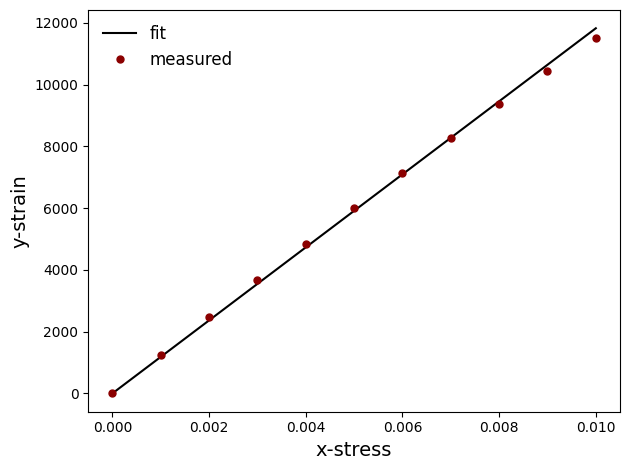

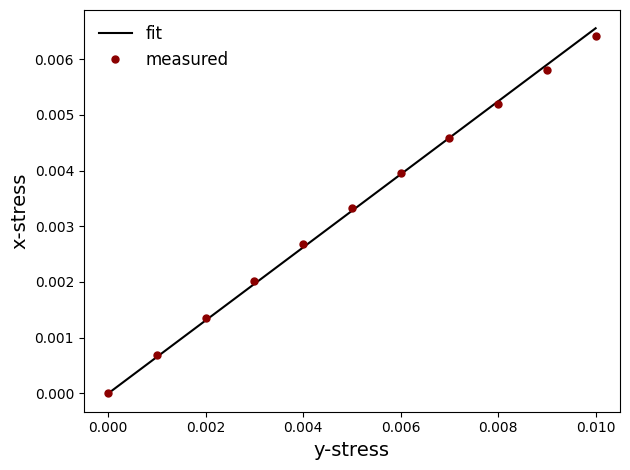

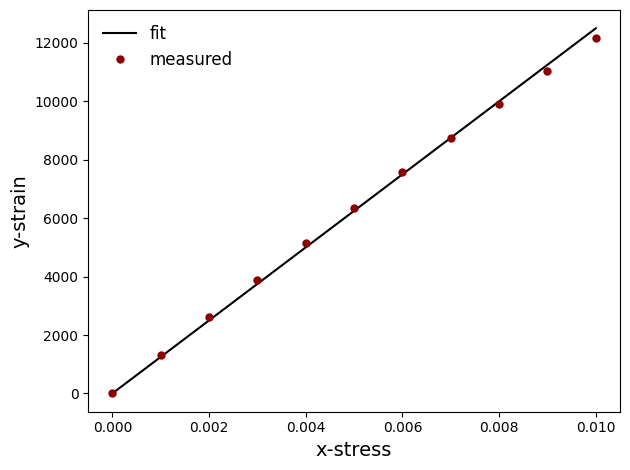

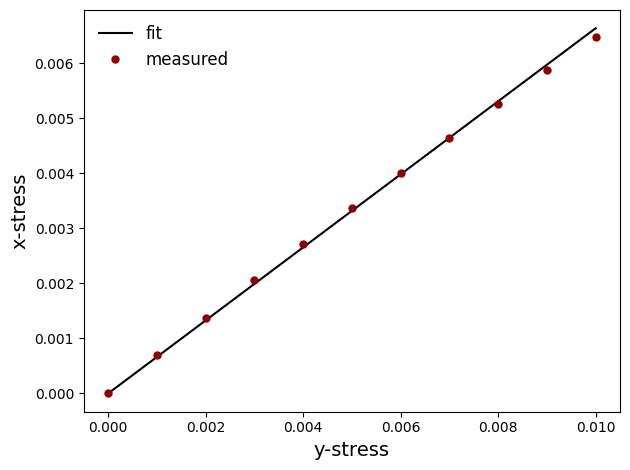

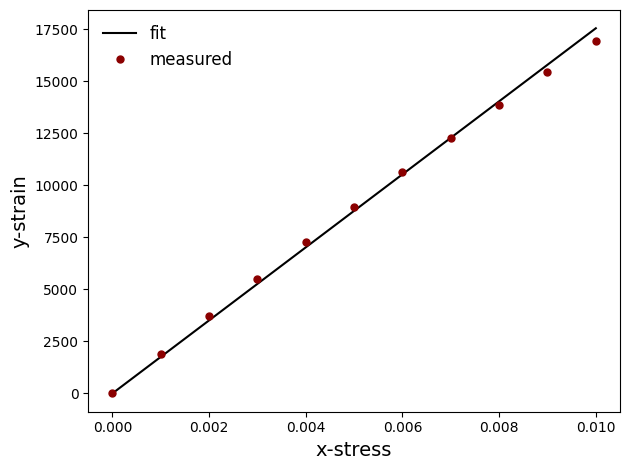

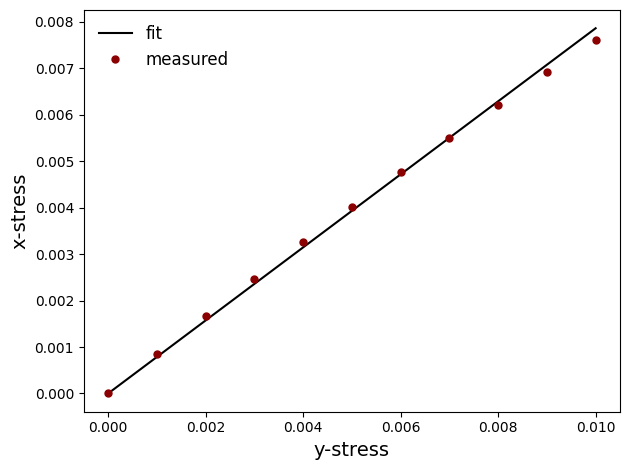

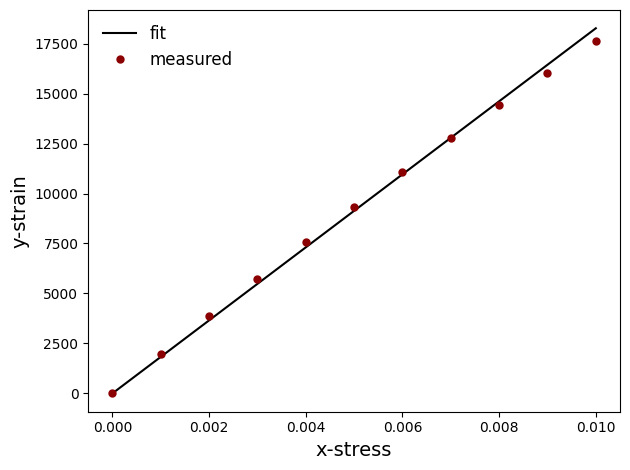

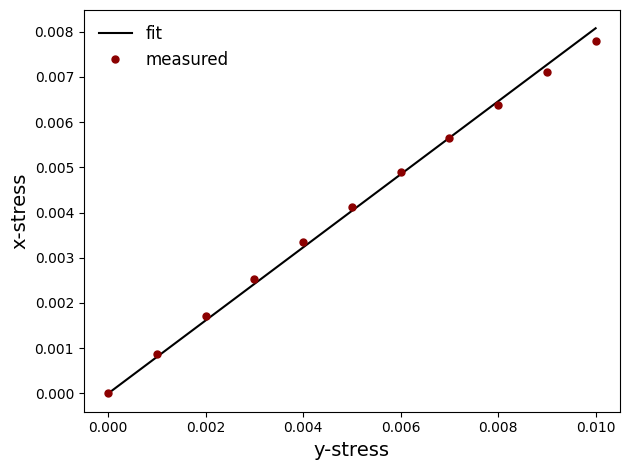

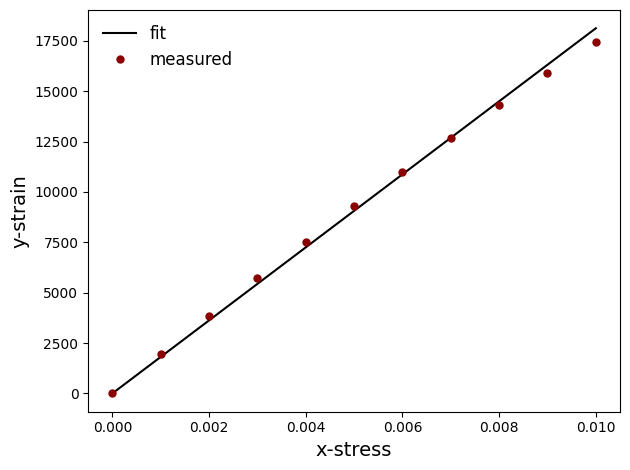

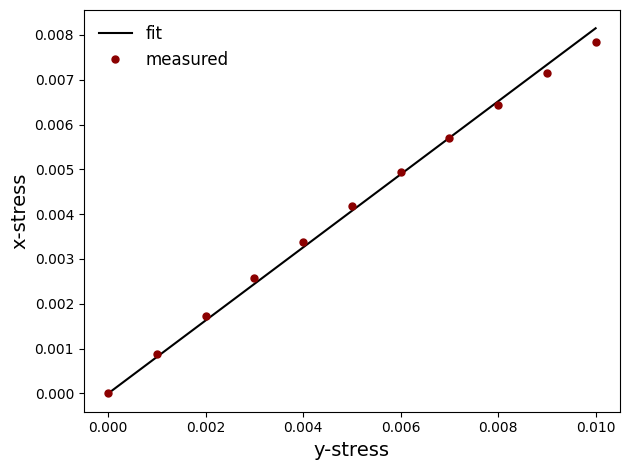

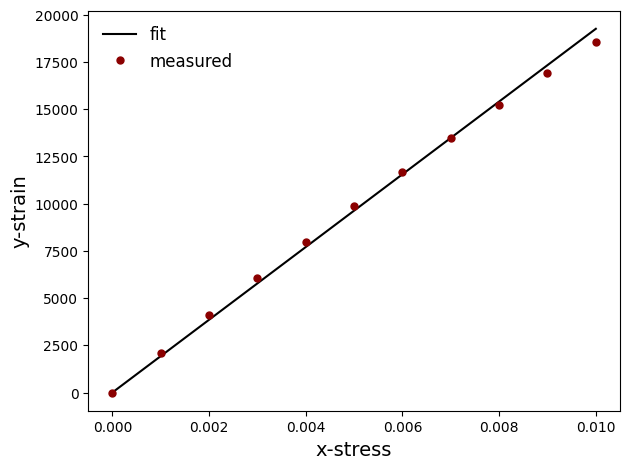

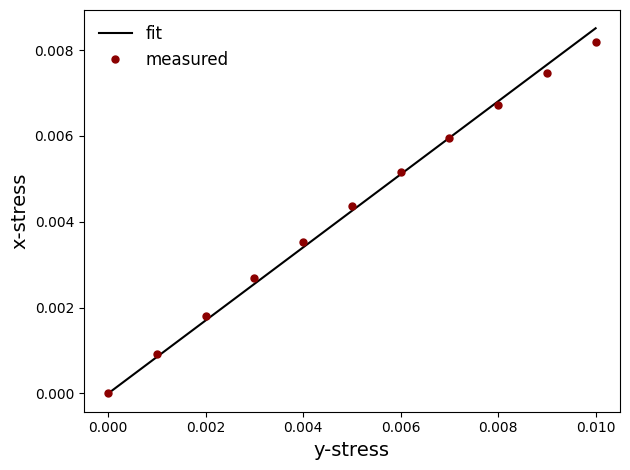

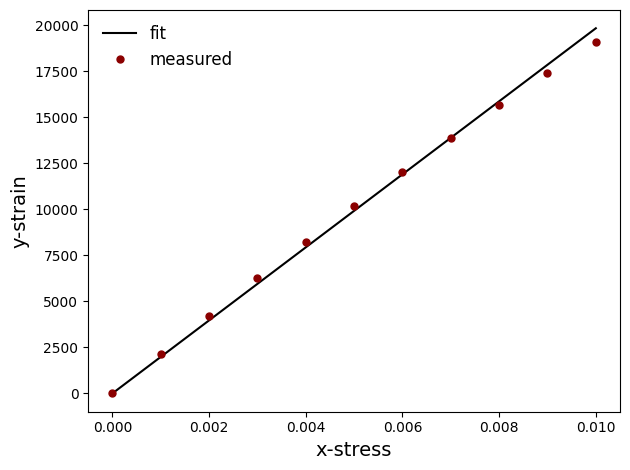

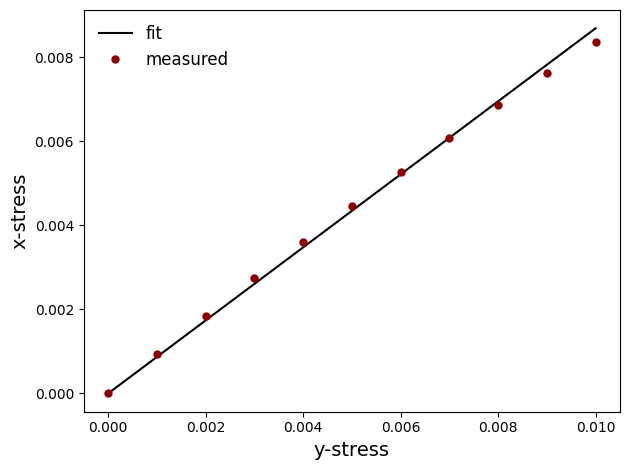

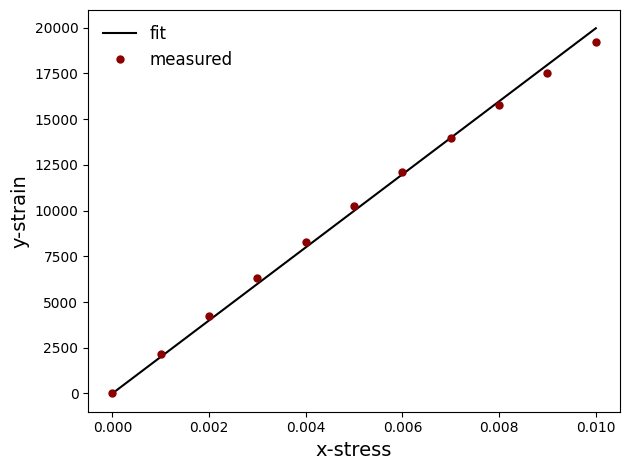

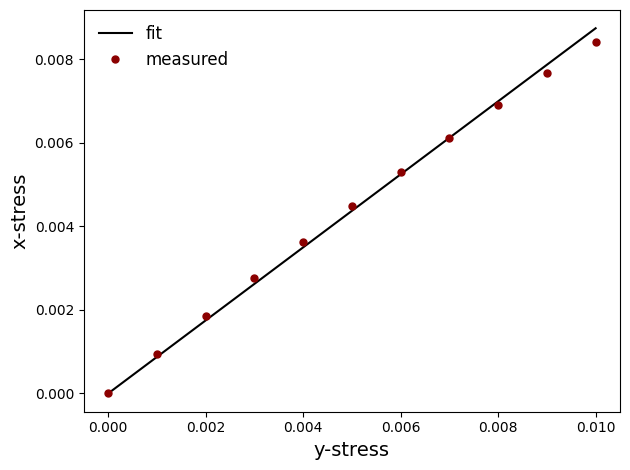

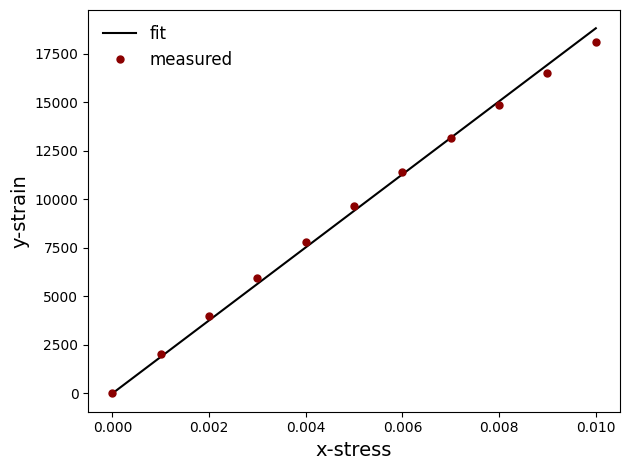

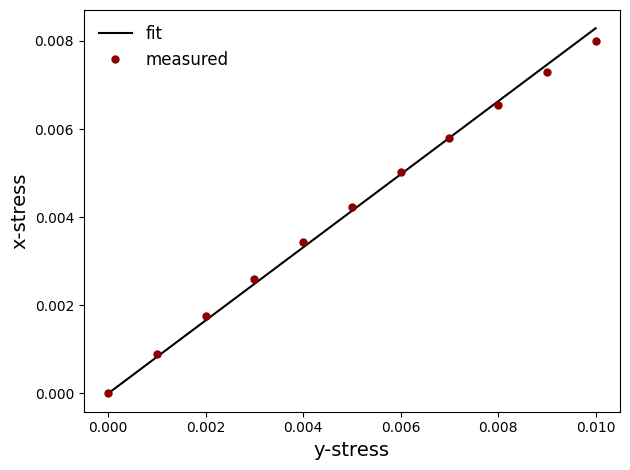

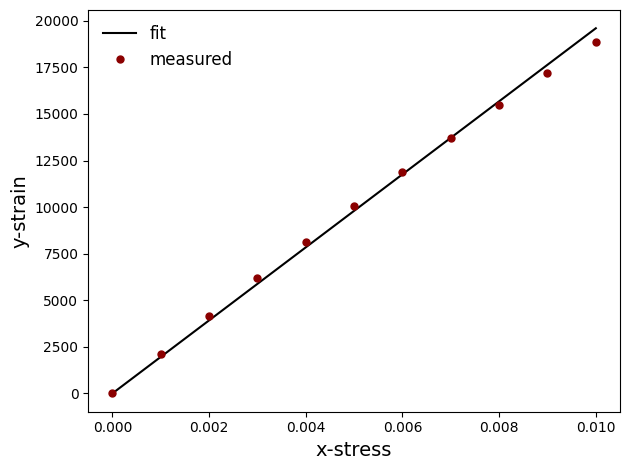

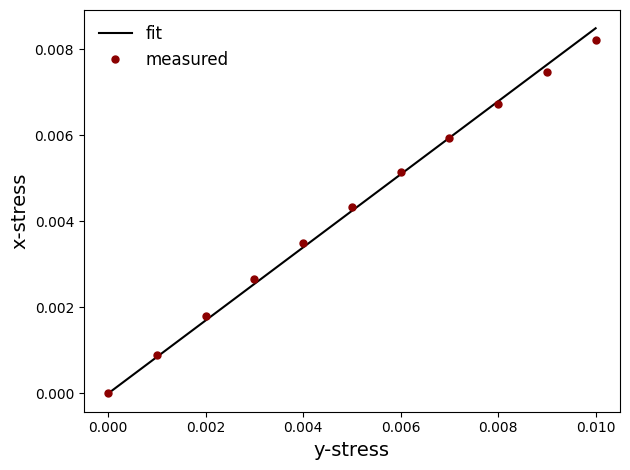

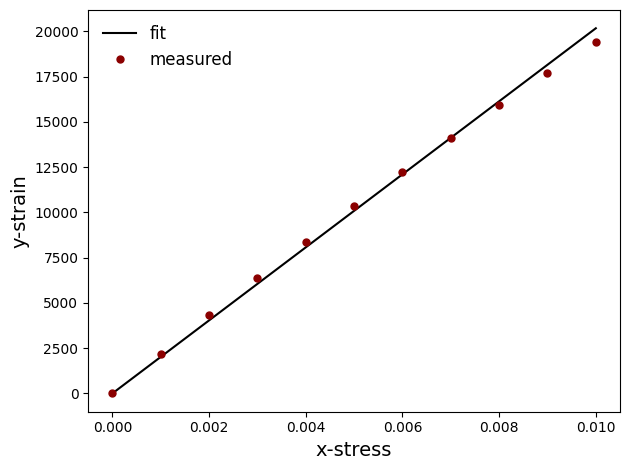

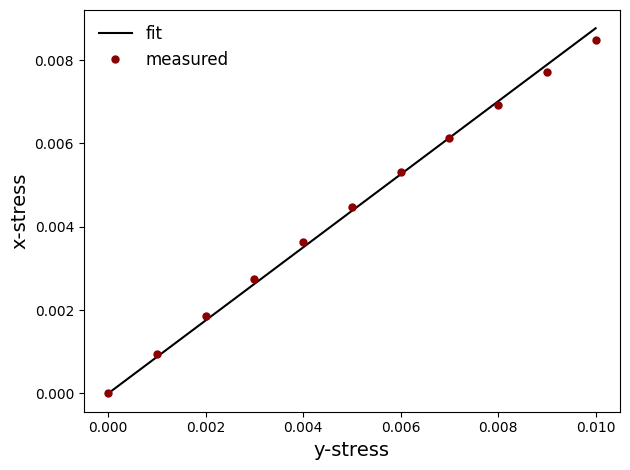

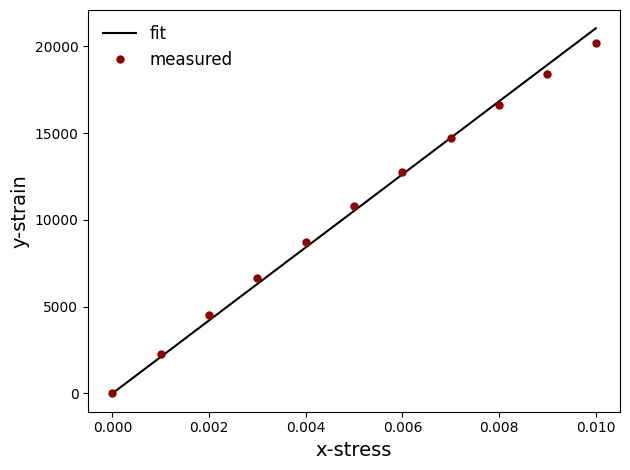

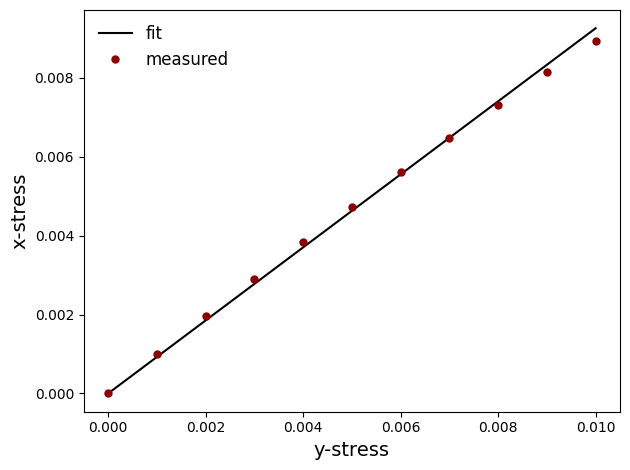

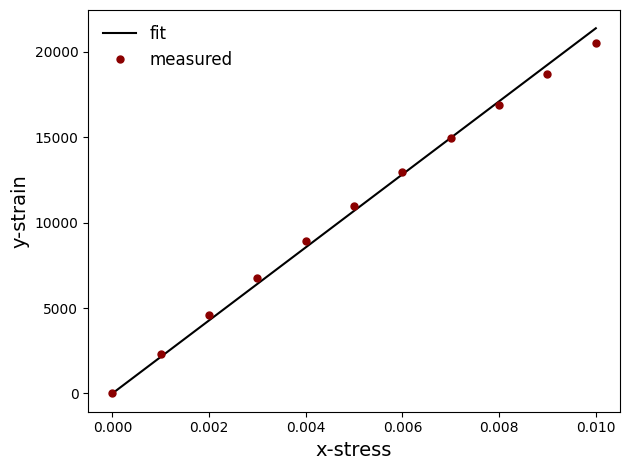

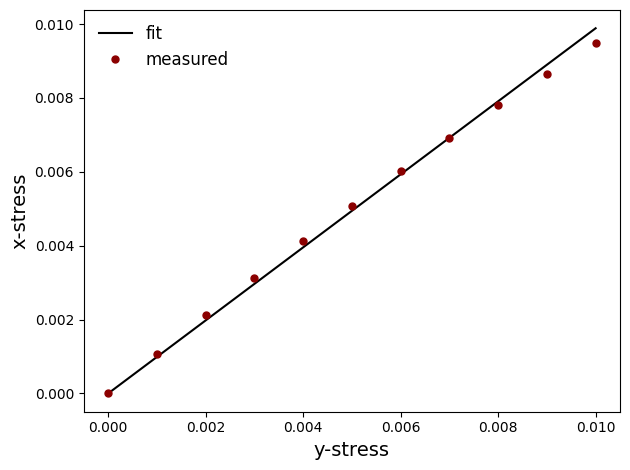

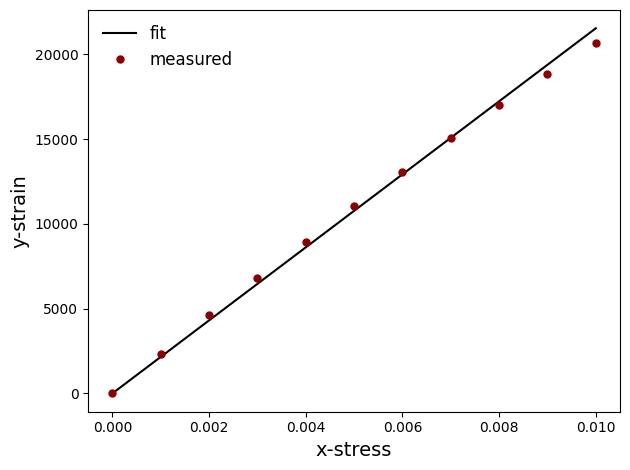

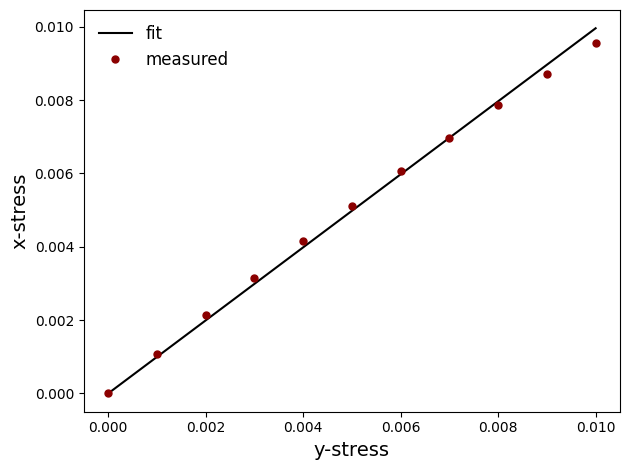

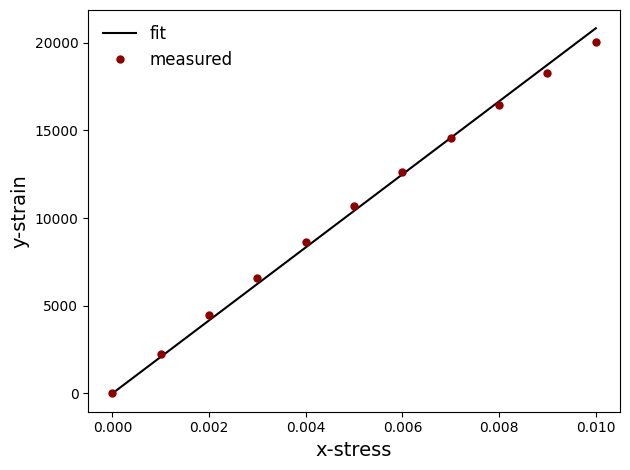

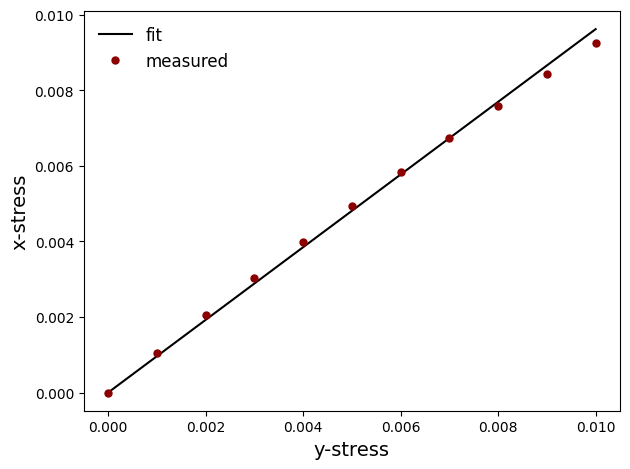

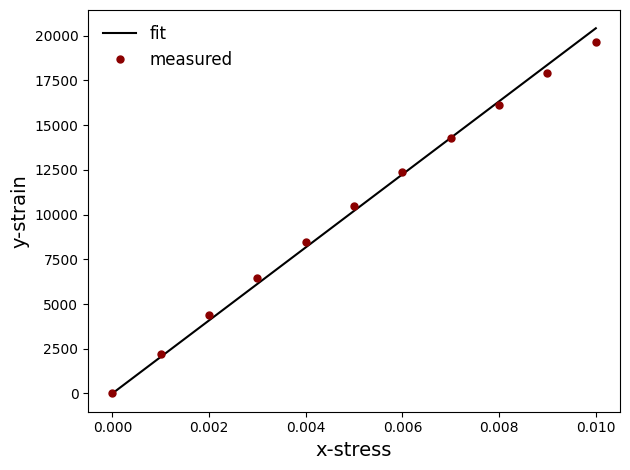

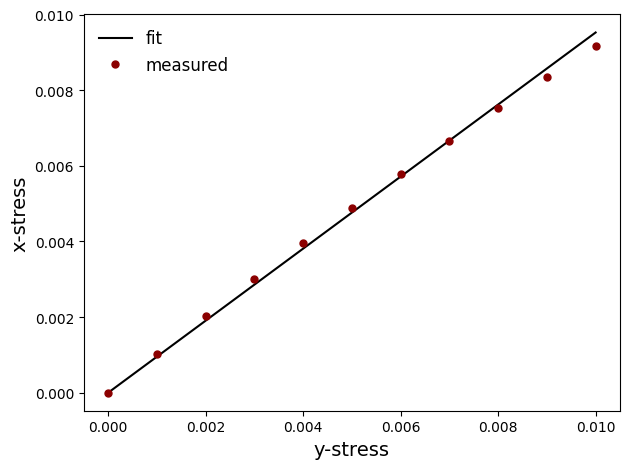

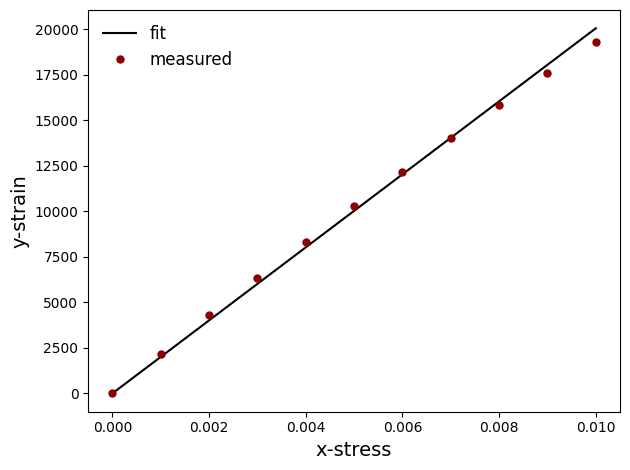

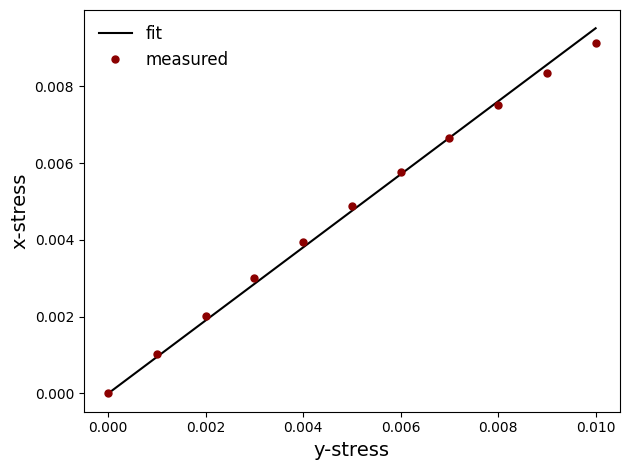

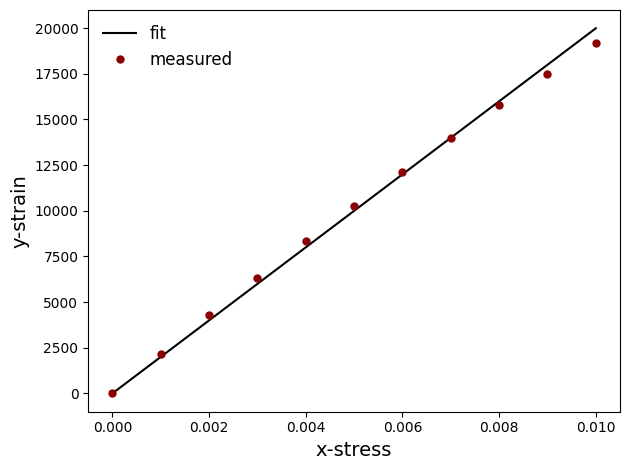

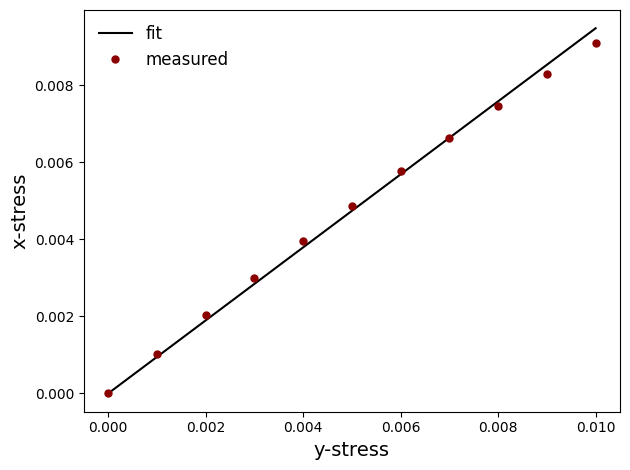

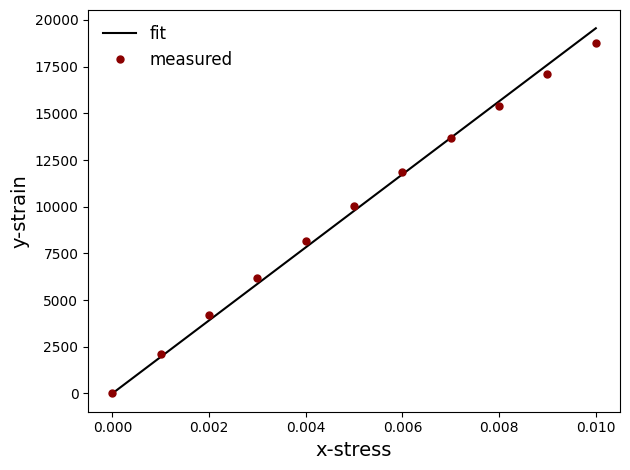

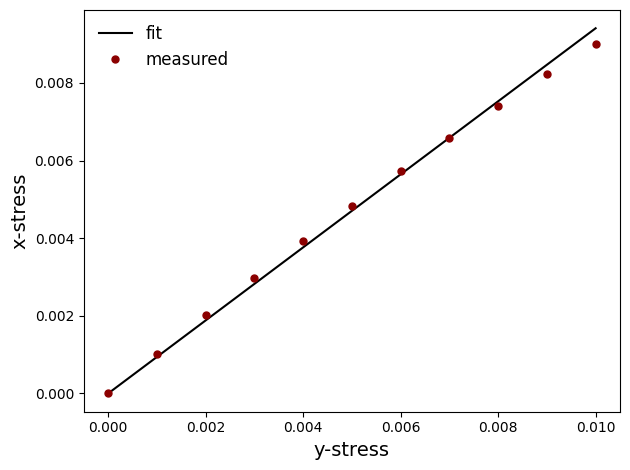

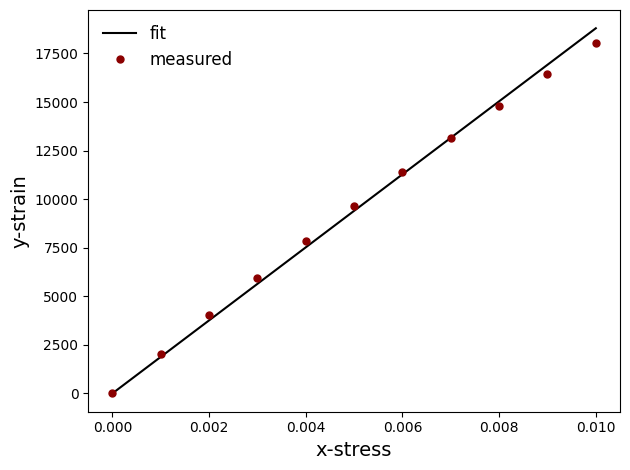

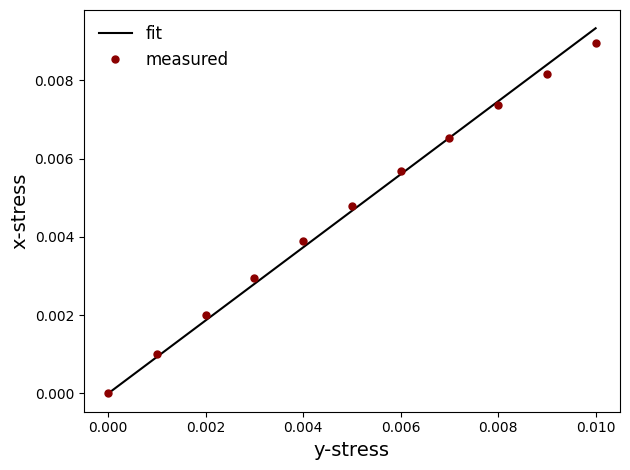

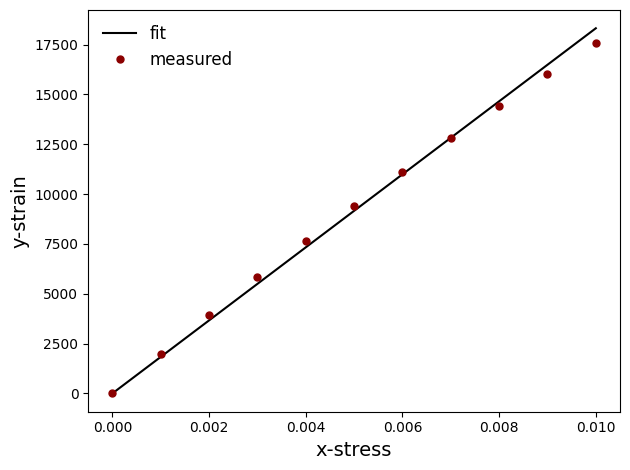

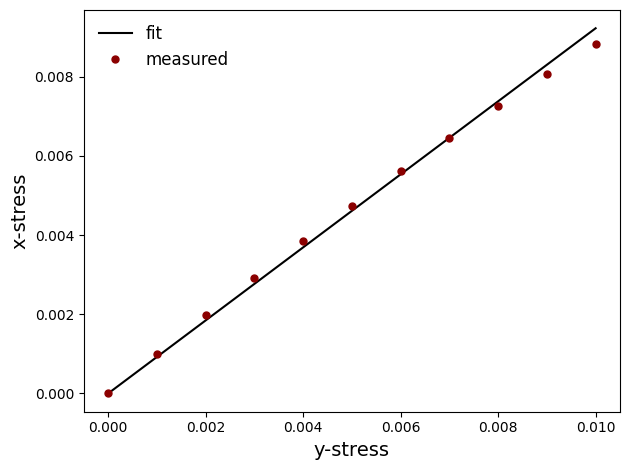

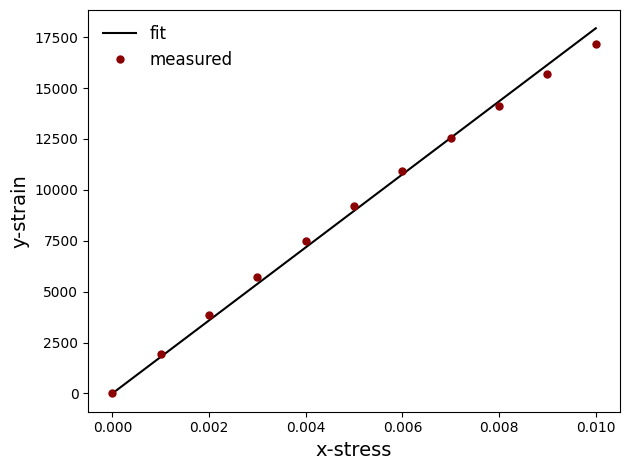

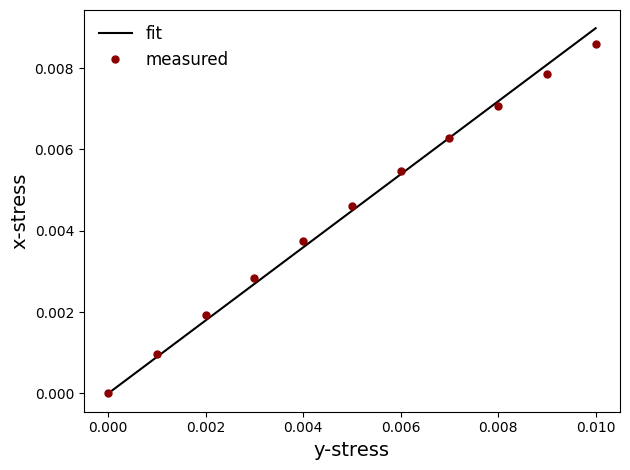

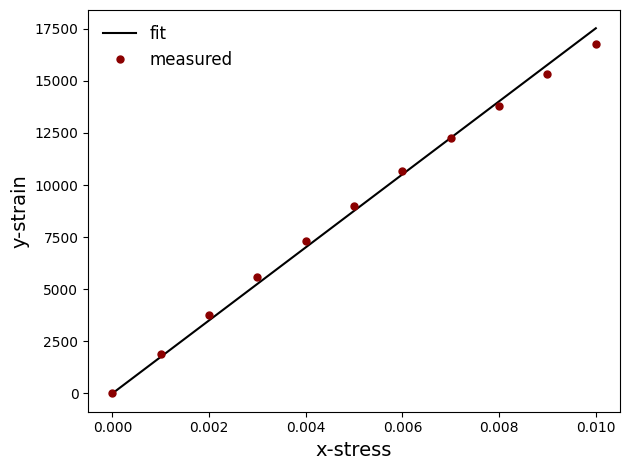

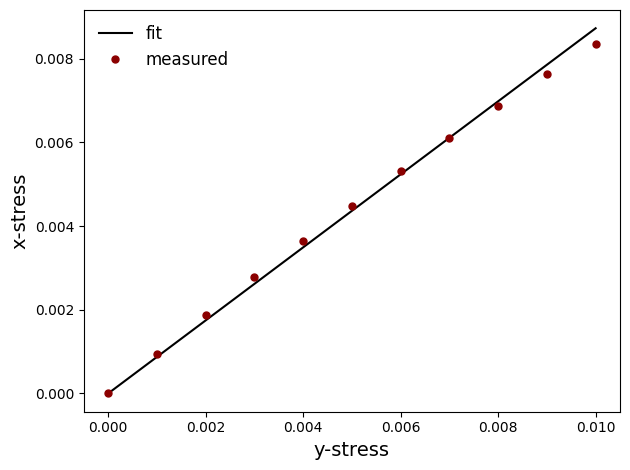

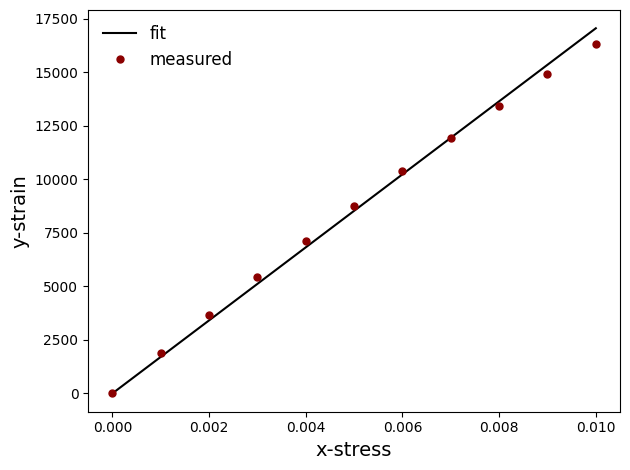

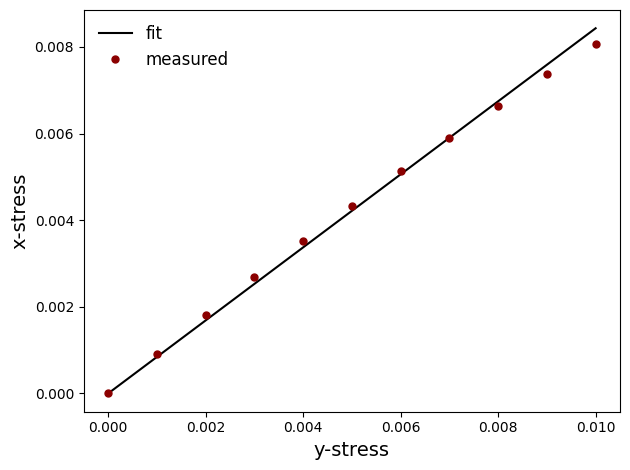

In [4]:
# Set up the lattice
lattice_setup = {'type': 'honeycomb',
                 'num': 15,
                 'seed': 1224,
                 'remove_nodes': 0,
                 'remove_edges': 0.,
                 'lattice': lattice, # use pre-constructed lattice as base
                 'move_nodes': [0., 0.8],
                 'add_edges': [0, 0.2],
                 'BeamCrossArea_A': 0.00002,
                'YoungsModulus_E': 2*1e9,
                'oversaturate_edges': {'r': 0.2, 'p': .3},
                 'edge_mask_init': {'random': False, 'modulating_factor': .25, 'offset': 0., 'train': True,\
                                    'gradient': {'function': 'super', 'alpha': 100.}}, 
                 'train_coordinates': True,
                }

lat = DifferentiableLattice(lattice_setup)

experiment_setup = {'forced_nodes': lat.original.top_nodes[:-4],
                    'static_nodes': lat.original.bottom_nodes[:-4],
                    'displacement': 0.01/10.,
                    'num_steps': 10}

model = FEModel()
lat.draw_lattice()
# keep outer nodes all fixed during inverse design
outer_nodes = lat.original.outer_nodes
outer_values = lat.coordinates[outer_nodes].detach() 
pincer_values = lat.coordinates[[52,53,54,55, 75,76,77,78]].detach()

# loss function and optimizer
lossf = torch.nn.L1Loss()
optimizer = torch.optim.Adam([{'params': lat.edge_mask, 'lr':0.01},\
                              {'params': lat.coordinates, 'lr': 0.001}], weight_decay = 0)

np.random.seed(123123144)
rec = RecordAndSave('results', 'Grabber')

stiff, pr, dr = get_Yprop(lat, model, experiment_setup)
rec.add({'edges': torch.Tensor(lat.active_edges), 'coords': lat.coordinates, 'delta': dr})
for j in trange(60):
    # randomly mask edges that are active, but have low mask value
    if j % 5 == 0:
        inactive = (lat.edge_mask < 0).sum().detach().numpy()
        active = (lat.edge_mask >= 0).sum().detach().numpy()
        deactivate = int(active*0.01)
        print(deactivate)
        inactive_id = lat.edge_mask.argsort()[inactive:inactive+deactivate]
        lat.edge_mask.data[inactive_id] *= 0
        lat.edge_mask.data[inactive_id] -= 0.02
        # update conflicting edges
        lat.update_edge_constraints()
    # training part
    optimizer.zero_grad()
    stiff, pr, dr = get_Yprop(lat, model, experiment_setup)
    density = lat.density
    print(dr[[77,78,55,54]], density, lat.active_edge_mask_torch.sum())
    loss = lossf(dr[[77,78, 55, 54]], torch.Tensor([[ 0., -0.02],[ 0., -0.02], [0.,0.02], [0.,0.02]]))
    rec.add({'edges': torch.Tensor(lat.active_edges), 'coords': lat.coordinates, 'delta': dr, 'loss': loss})
    loss.backward()
    optimizer.step()
    # keep outer nodes unchanged
    lat.coordinates.data[outer_nodes] = outer_values
    lat.coordinates.data[[52,53,54,55, 75,76,77,78]] = pincer_values

#### Plot final design

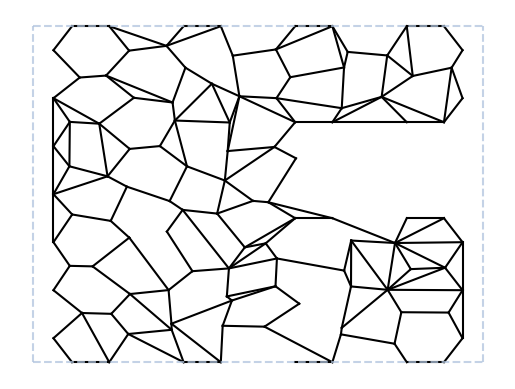

In [6]:
lat.draw_lattice(original_coords=False)

#### Investigate response to external load of the final design

tensor(1653703., grad_fn=<DivBackward0>) tensor(0.8161, grad_fn=<DivBackward0>)


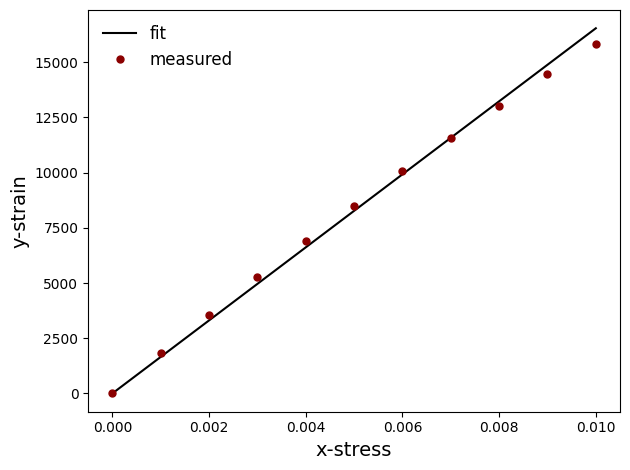

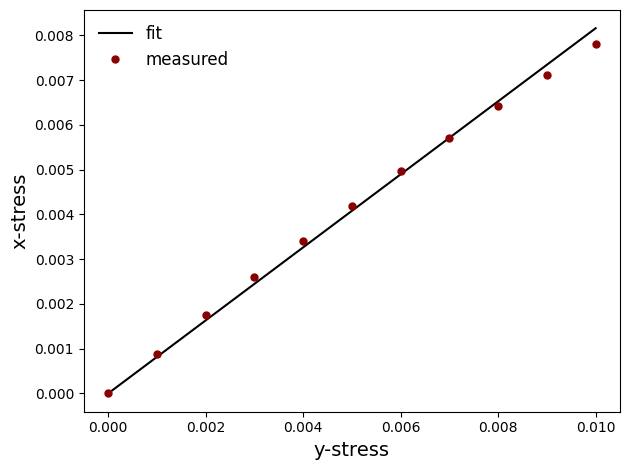

In [7]:
stiff, sigma, delta = get_Yprop(lat, model, experiment_setup)
print(stiff, sigma)

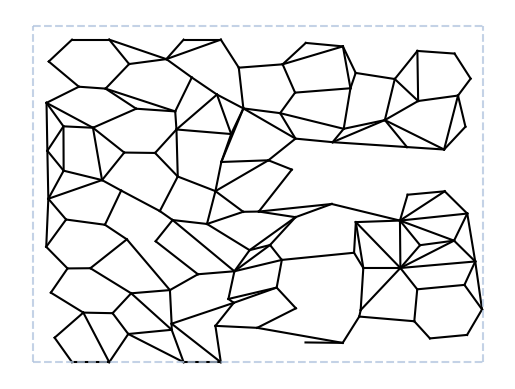

In [11]:
lat.draw_lattice(4*delta, original_coords = False)

#### Save recorded data

In [7]:
rec.save()

#### Animation showing the changes to the lattice during inverse design
You can also look at grabber-lattice.gif for an example

<IPython.core.display.Javascript object>


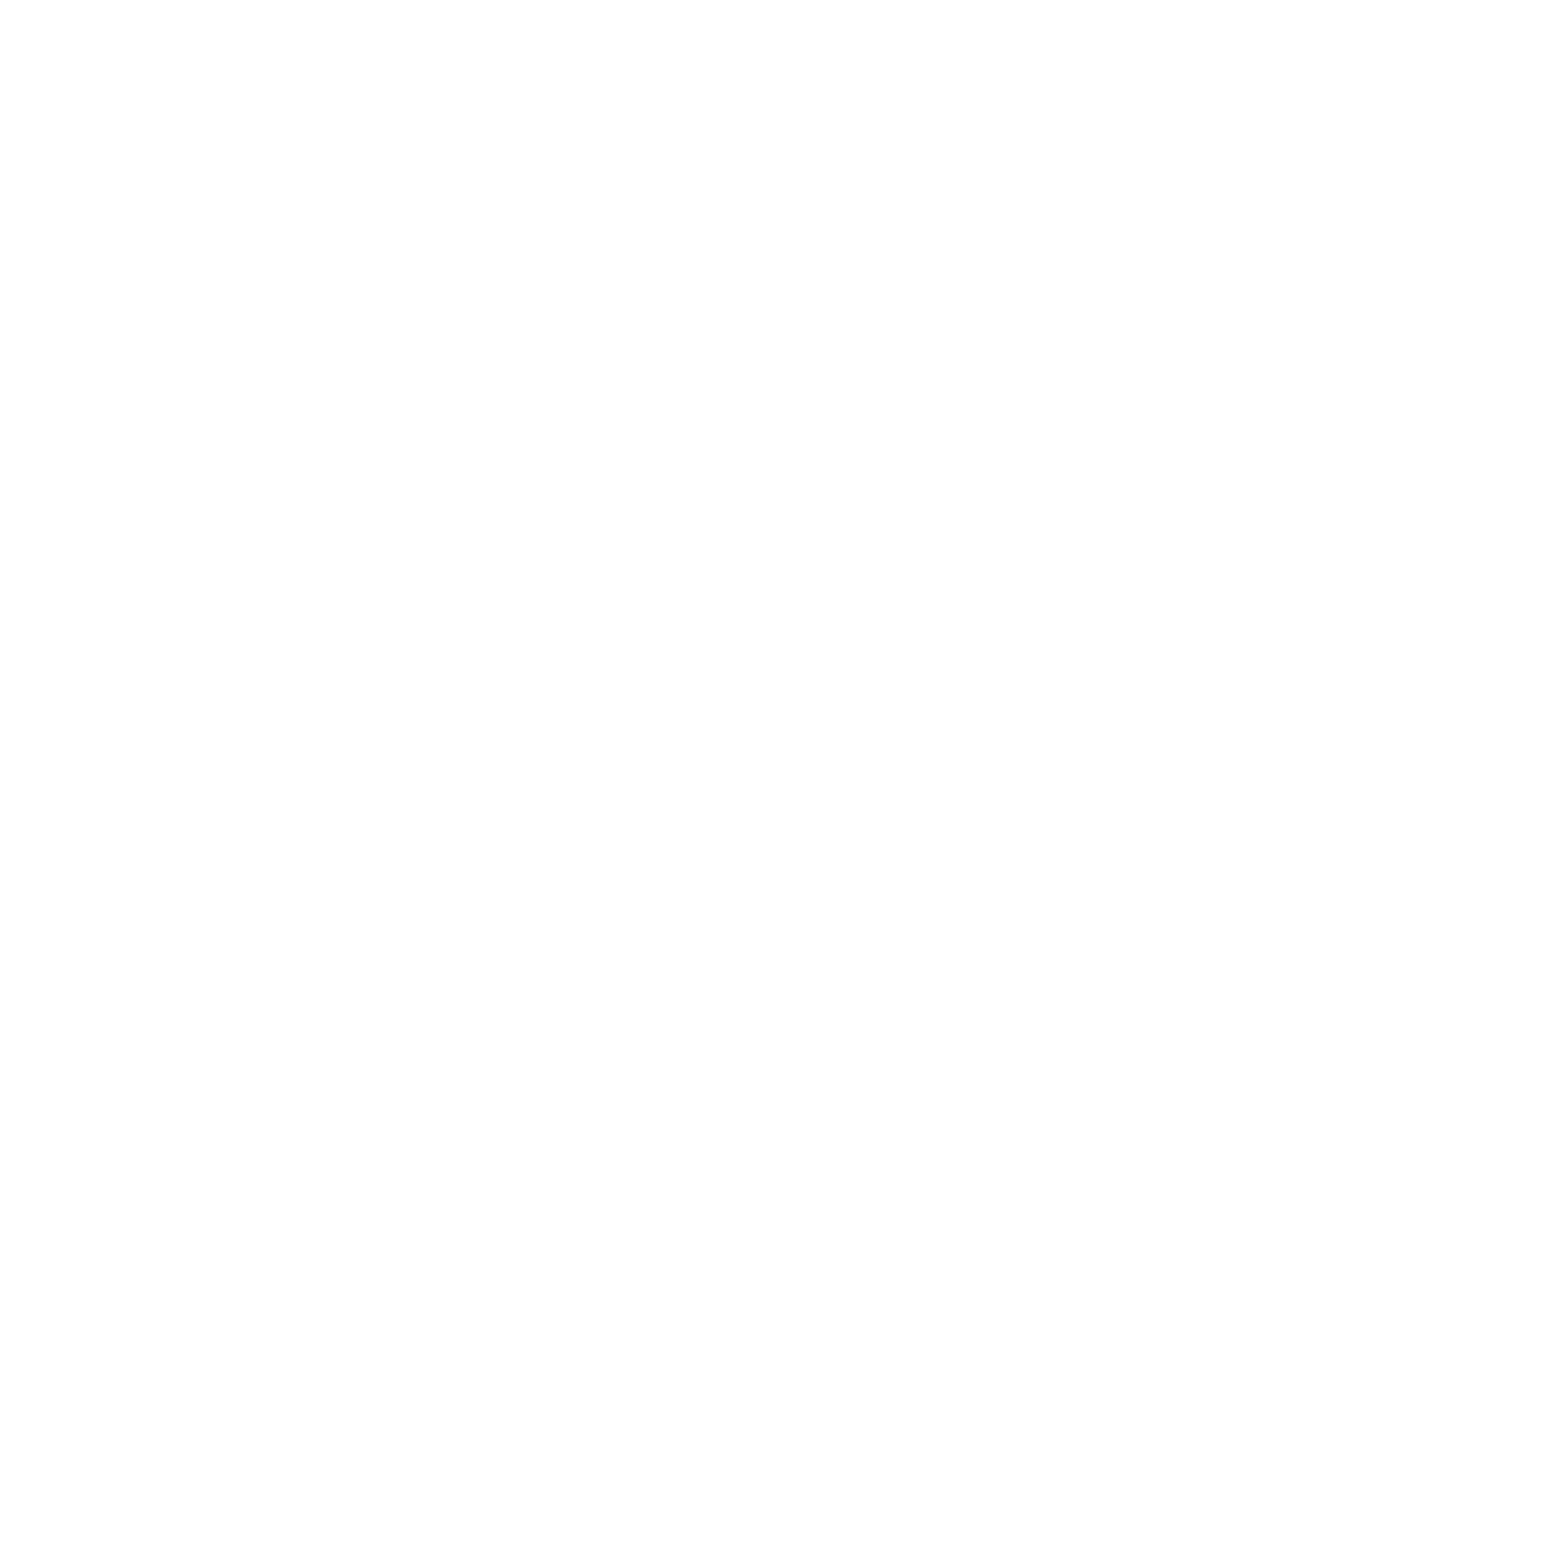

In [12]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 190
%matplotlib notebook

fig, ax = plt.subplots(1,2, figsize=(5,5))
kk=0
fac = 3
for i,j in rec['edges'][kk]:
    i = int(i)
    j = int(j)
    ln, = ax[0].plot([rec['coords'][kk][i][0], rec['coords'][kk][j][0]], [rec['coords'][kk][i][1], rec['coords'][kk][j][1]], color = 'k', alpha = 1., zorder=1)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])

def init():
    return ln,

def update(kk):
    ax[0].clear()
    ax[1].clear()
    for i,j in rec['edges'][kk]:
        i = int(i)
        j = int(j)
        ax[0].plot([rec['coords'][kk][i][0], rec['coords'][kk][j][0]], [rec['coords'][kk][i][1], rec['coords'][kk][j][1]], color = 'k', alpha = 1., zorder=1)
    for i,j in rec['edges'][kk]:
        i = int(i)
        j = int(j)
        ax[1].plot([rec['coords'][kk][i][0]+fac*rec['delta'][kk][i][0], rec['coords'][kk][j][0]+fac*rec['delta'][kk][j][0]], [rec['coords'][kk][i][1]+fac*rec['delta'][kk][i][1], rec['coords'][kk][j][1]+fac*rec['delta'][kk][j][1]], color = 'k', alpha = 1., zorder=1)
    ax[0].set_xticks([])
    ax[1].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_yticks([])
    ax[1].set_ylim(-0.55, 0.6)
    ax[0].set_ylim(-0.55, 0.6)
    ax[0].set_title('Iteration {}'.format(kk), x=1.15)

ani = FuncAnimation(fig, update, frames=np.arange(0,50,1),
                    init_func=init, blit=True)

# ani.save('ani.gif', writer='imagemagick')